<a href="https://colab.research.google.com/github/leoceokh/Snowflake_health/blob/main/dongiveup_project_kj01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install scikit-learn

## 데이터 수집 및 로드

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

from google.colab import files


# 파일 업로드
uploaded = files.upload()

# 다양한 인코딩으로 파일 읽기 시도
encodings = ['utf-8', 'cp949', 'euc-kr', 'iso-8859-1']

for encoding in encodings:
    try:
        kimchi_data = pd.read_csv('kimchi_data.csv', encoding=encoding)
        print(f"파일을 성공적으로 불러왔습니다. 사용된 인코딩: {encoding}")
        print(kimchi_data.head())
        break
    except UnicodeDecodeError:
        print(f"{encoding} 인코딩으로 읽기 실패. 다음 인코딩 시도 중...")
    except Exception as e:
        print(f"예상치 못한 오류 발생: {e}")

if 'kimchi_data' not in locals():
    print("모든 인코딩 시도 실패. 파일 형식을 확인해주세요.")

Saving kimchi_data.csv to kimchi_data (4).csv
utf-8 인코딩으로 읽기 실패. 다음 인코딩 시도 중...
파일을 성공적으로 불러왔습니다. 사용된 인코딩: cp949
       일시  평균기온(℃)  평균최고기온(℃)  최고기온(℃)  평균최저기온(℃)  최저기온(℃)  평균월강수량(mm)  \
0  Sep-24      NaN        NaN     35.4        NaN     13.5         1.8   
1  Aug-24     27.9       33.0     39.3       24.1     14.6        87.3   
2  Jul-24     26.2       29.9     37.7       23.3     13.6       379.2   
3  Jun-24     22.7       28.4     37.7       17.5      2.0       130.5   
4  May-24     17.7       24.0     33.4       11.8     -1.3       117.6   

   최다월강수량(mm)  1시간최다강수량(mm)  평균풍속(m/s)  ...  최대순간풍속(m/s)  평균습도(%rh)  \
0        23.0          13.9        NaN  ...         15.2        NaN   
1       232.9          96.0        1.5  ...         22.1       78.0   
2       759.5          93.5        2.0  ...         26.5       83.0   
3       288.2          38.1        1.6  ...         25.1       70.0   
4       323.8          33.0        1.9  ...         29.1       67.0   

   최저습도(%rh)  일

## 데이터 결측값 확인 및 시각화

In [ ]:
print("kimchi_data:")
print(kimchi_data.head())
print("\nkimchi_data:")

kimchi_data:
       일시  평균기온(℃)  평균최고기온(℃)  최고기온(℃)  평균최저기온(℃)  최저기온(℃)  평균월강수량(mm)  \
0  Sep-24      NaN        NaN     35.4        NaN     13.5         1.8   
1  Aug-24     27.9       33.0     39.3       24.1     14.6        87.3   
2  Jul-24     26.2       29.9     37.7       23.3     13.6       379.2   
3  Jun-24     22.7       28.4     37.7       17.5      2.0       130.5   
4  May-24     17.7       24.0     33.4       11.8     -1.3       117.6   

   최다월강수량(mm)  1시간최다강수량(mm)  평균풍속(m/s)  ...  최대순간풍속(m/s)  평균습도(%rh)  \
0        23.0          13.9        NaN  ...         15.2        NaN   
1       232.9          96.0        1.5  ...         22.1       78.0   
2       759.5          93.5        2.0  ...         26.5       83.0   
3       288.2          38.1        1.6  ...         25.1       70.0   
4       323.8          33.0        1.9  ...         29.1       67.0   

   최저습도(%rh)  일조합(hr)  일사합(MJ/m2)   배추값    무값   고추값    마늘값    쪽파값  
0         33     18.3       50.08  6618  3661  

In [ ]:
# 결측값 확인 및 시각화
print("\Missing Values in kimchi_data:")
print(kimchi_data.isnull().sum())

\Missing Values in kimchi_data:
일시              0
평균기온(℃)         1
평균최고기온(℃)       1
최고기온(℃)         0
평균최저기온(℃)       1
최저기온(℃)         0
평균월강수량(mm)      0
최다월강수량(mm)      0
1시간최다강수량(mm)    0
평균풍속(m/s)       1
최대풍속(m/s)       0
최대순간풍속(m/s)     0
평균습도(%rh)       1
최저습도(%rh)       0
일조합(hr)         0
일사합(MJ/m2)      0
배추값             0
무값              0
고추값             0
마늘값             0
쪽파값             0
dtype: int64


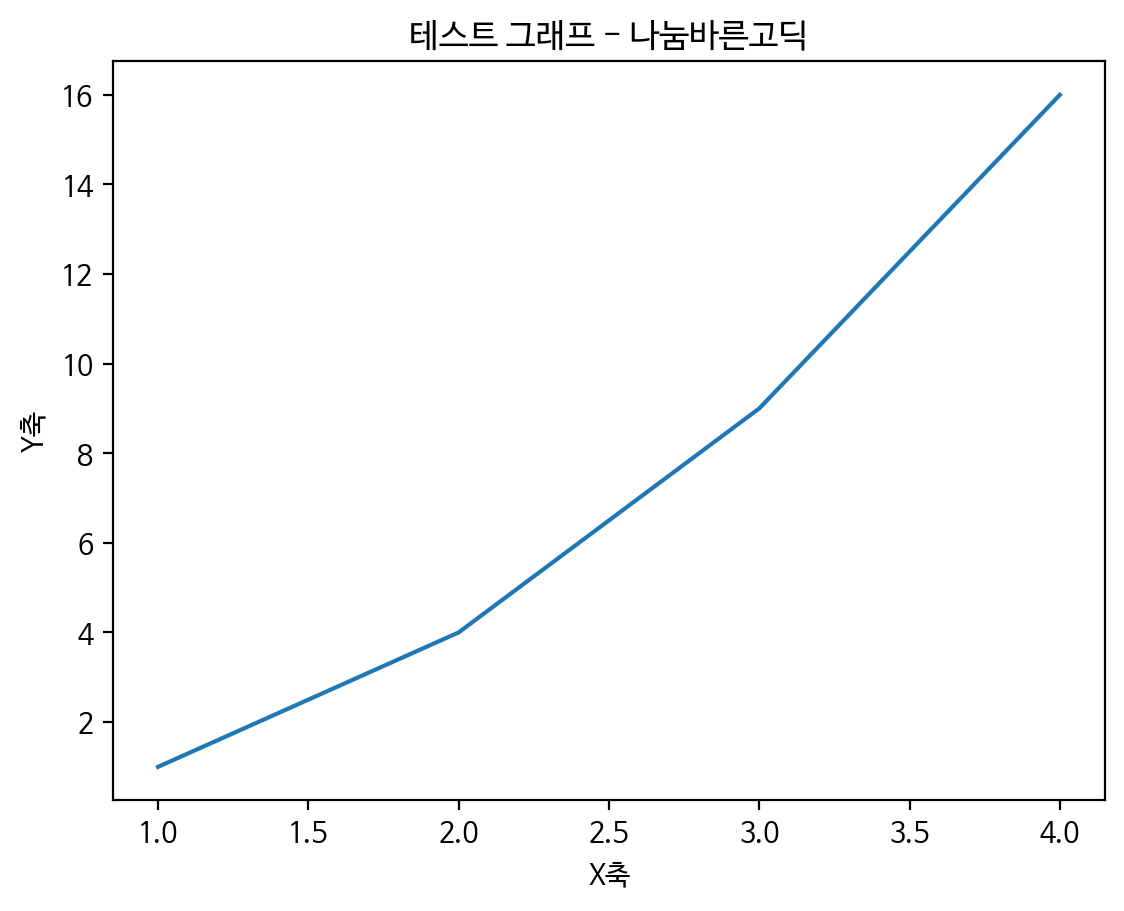

In [ ]:
# 폰트 설치
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 경로 설정
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=fontpath, size=9)

# 폰트 매니저에 추가
fm.fontManager.addfont(fontpath)

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 샘플 그래프 출력
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.title('테스트 그래프 - 나눔바른고딕')
plt.xlabel('X축')
plt.ylabel('Y축')
plt.show()


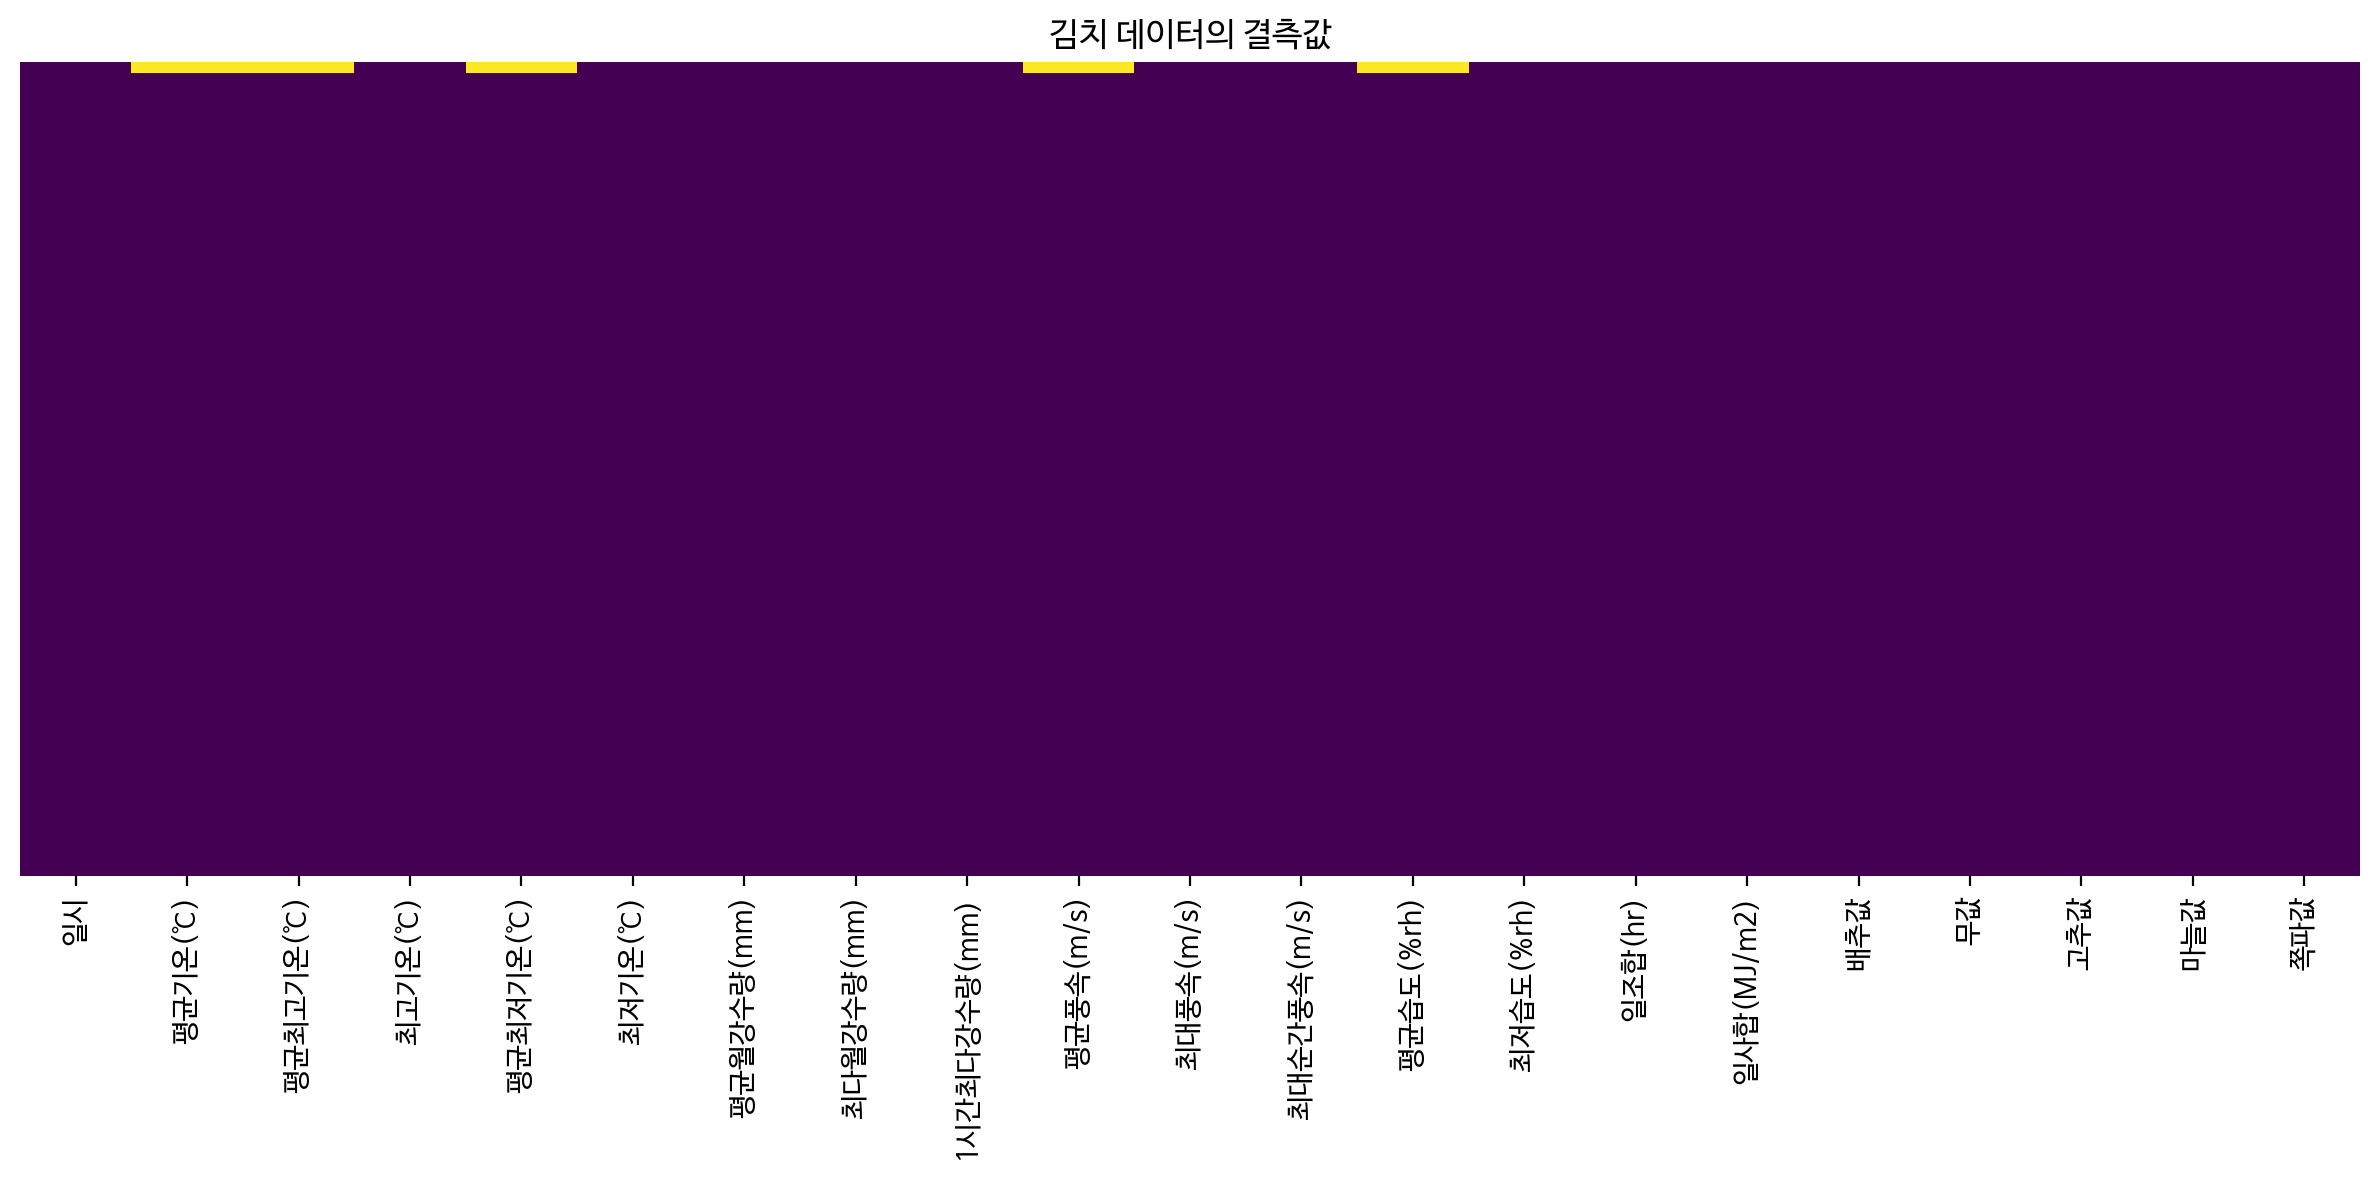

In [ ]:
# 결측값 히트맵 시각화

plt.figure(figsize=(12, 6))
sns.heatmap(kimchi_data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('김치 데이터의 결측값')
plt.tight_layout()
plt.show()

## 기본 통계량 확인


In [ ]:
print("\nKimchi Data Statistics:")
print(kimchi_data.describe())

# 평균 기온은 약 13.8°C이며, 최저 -1.4°C에서 최고 35.4°C까지 변동이 큽니다.
# 배추 가격은 평균 4,411원이며, 최저 2,252원에서 최고 10,740원까지 큰 폭으로 변동합니다.
# 무 가격은 평균 2,124원으로, 배추에 비해 변동 폭이 작습니다.
# 고추와 마늘 가격도 상당한 변동을 보입니다.


Kimchi Data Statistics:
         평균기온(℃)  평균최고기온(℃)    최고기온(℃)  평균최저기온(℃)    최저기온(℃)  평균월강수량(mm)  \
count  68.000000  68.000000  69.000000  68.000000  69.000000   69.000000   
mean   13.501471  18.983824  29.318841   8.705882  -4.424638  115.200000   
std     9.114029   8.770619   7.043964   9.653472  11.962876  111.740163   
min    -1.400000   3.800000  14.800000  -6.300000 -25.200000    1.800000   
25%     6.200000  11.800000  23.900000   1.050000 -15.600000   32.200000   
50%    13.900000  20.250000  30.000000   8.600000  -4.000000   78.900000   
75%    21.925000  26.725000  35.400000  17.775000   6.400000  160.500000   
max    27.900000  33.000000  39.300000  24.100000  15.300000  506.100000   

       최다월강수량(mm)  1시간최다강수량(mm)  평균풍속(m/s)  최대풍속(m/s)  최대순간풍속(m/s)  평균습도(%rh)  \
count   69.000000     69.000000  68.000000  69.000000    69.000000  68.000000   
mean   270.052174     43.171014   1.766176  22.192754    29.053623  69.426471   
std    237.428302     25.911842   0.218960   6.

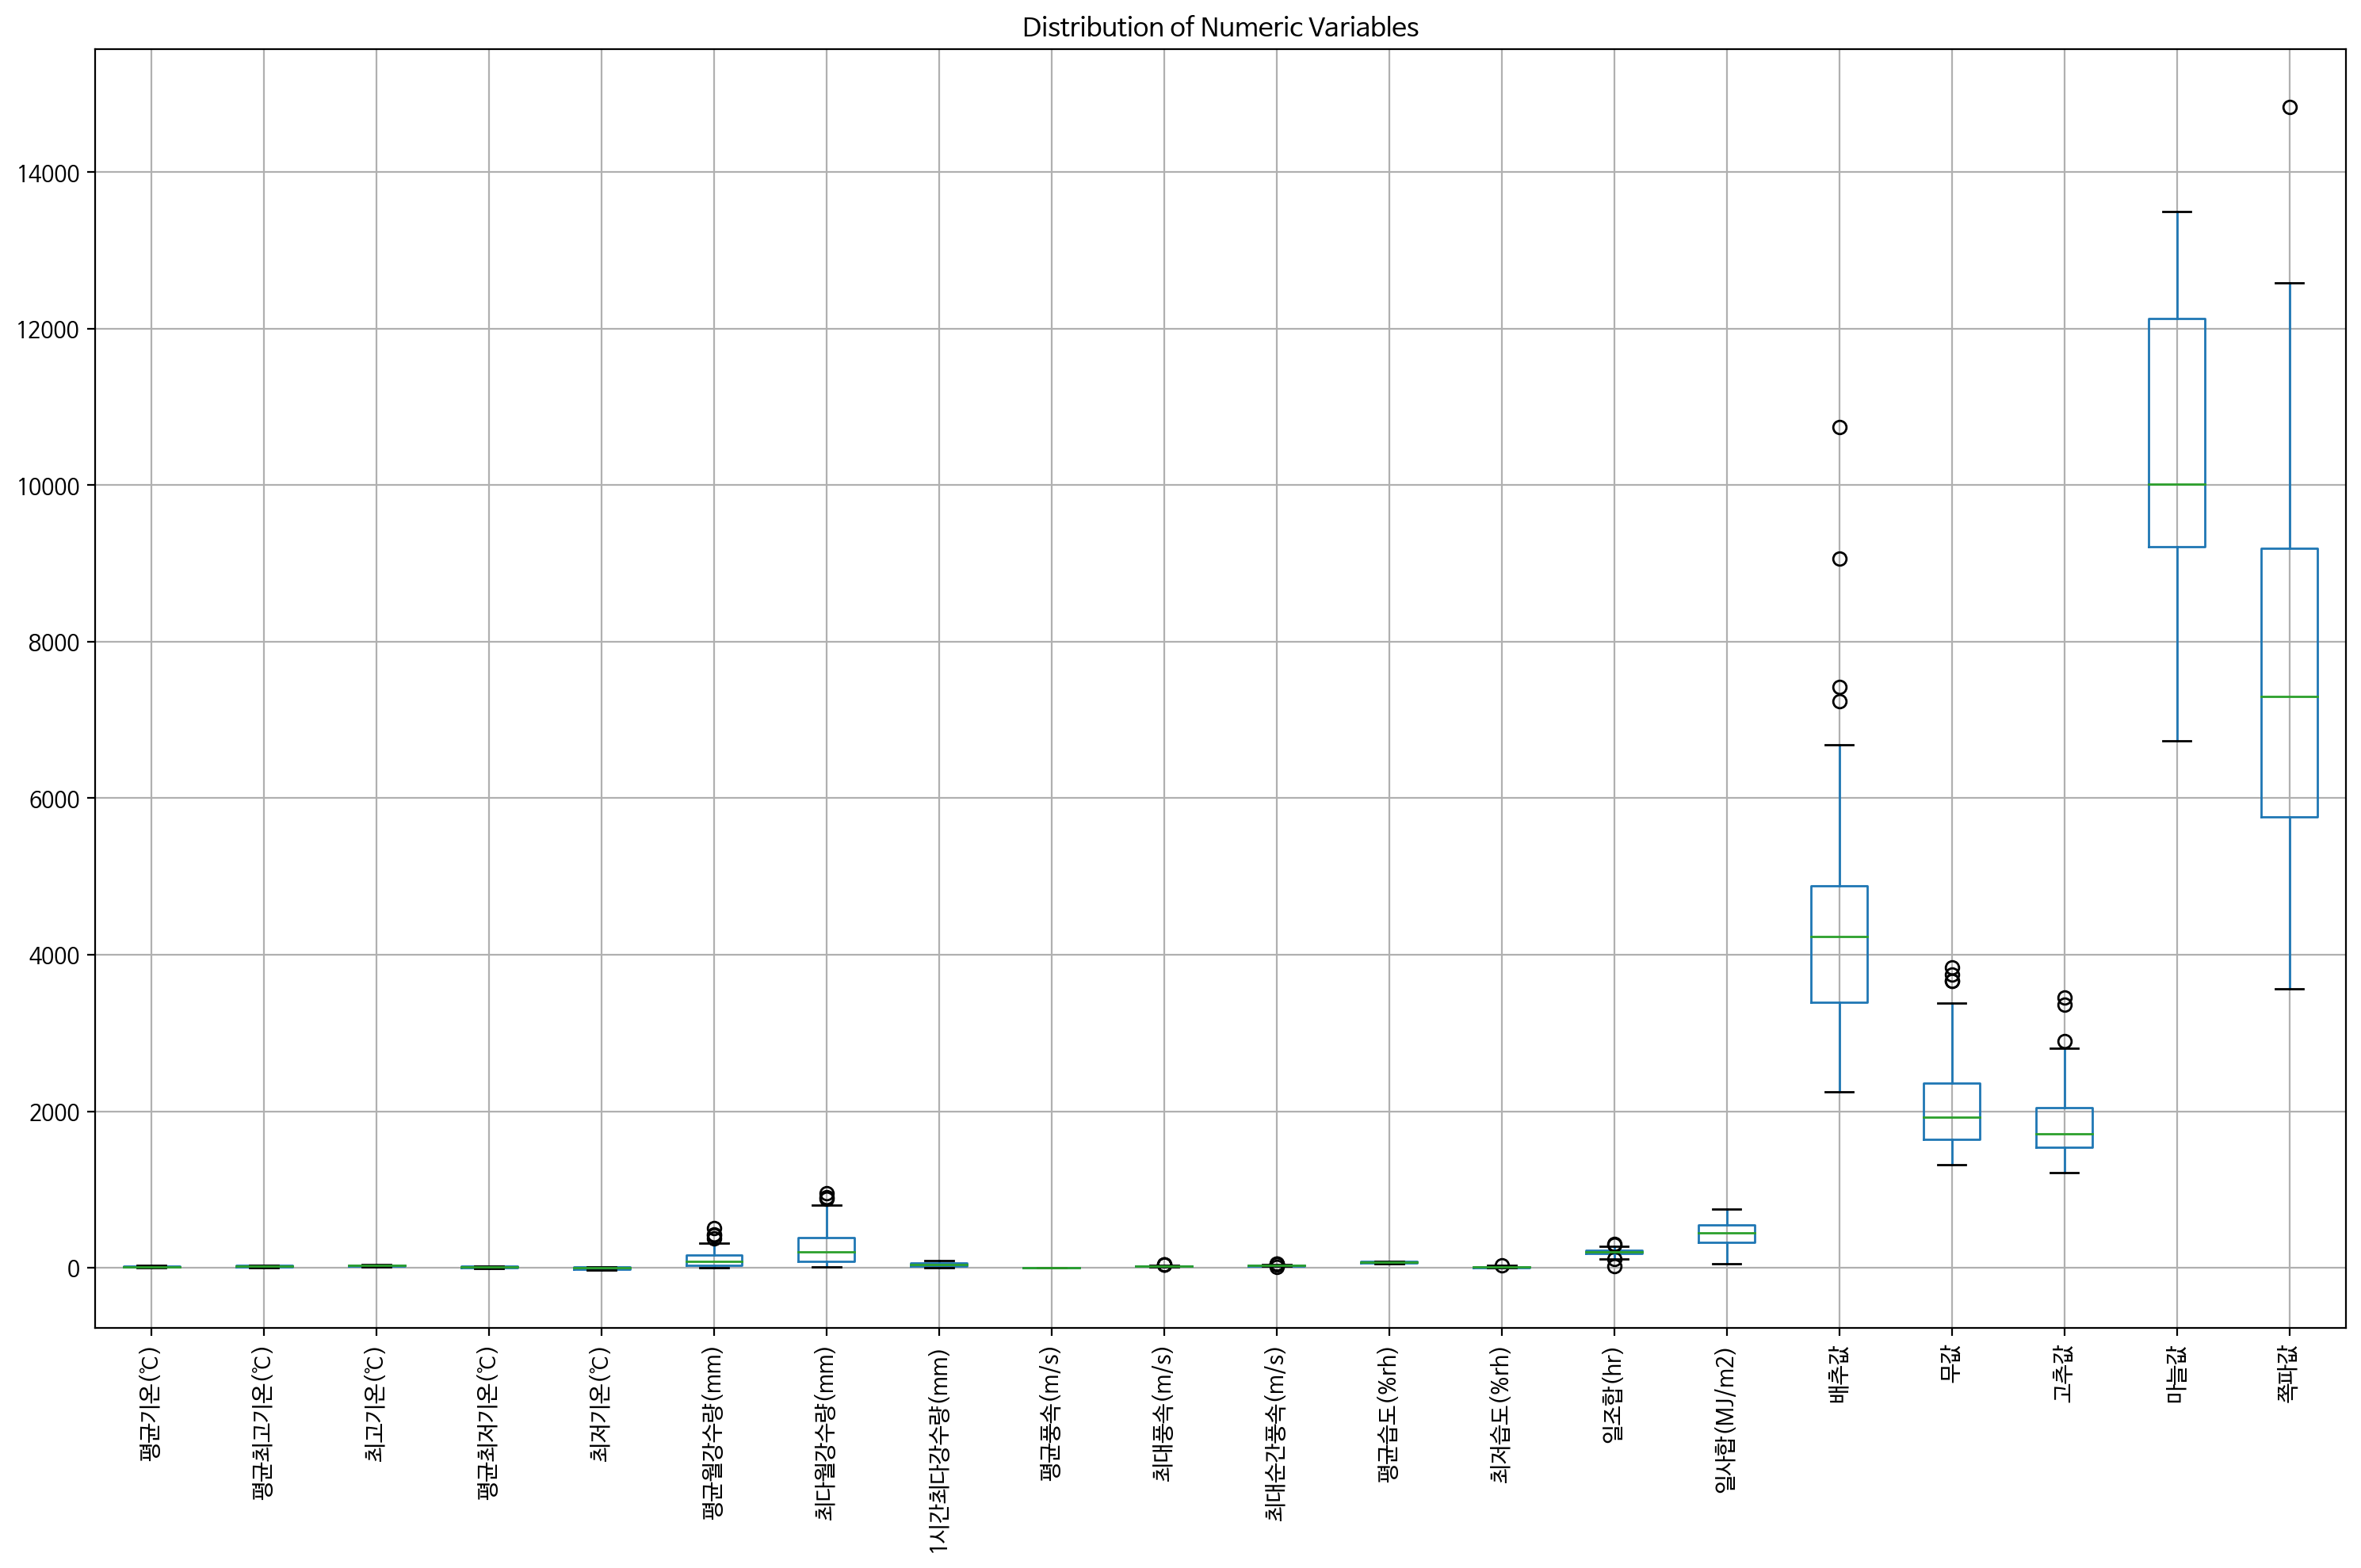

In [ ]:
# 수치형 변수 선택
numeric_columns = kimchi_data.select_dtypes(include=['float64', 'int64']).columns

# 박스플롯으로 각 변수의 분포 시각화
plt.figure(figsize=(15, 10))
kimchi_data[numeric_columns].boxplot()
plt.title('Distribution of Numeric Variables')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# 온도 관련 변수들(평균기온, 최고기온, 최저기온)은 상대적으로 좁은 범위의 분포를 보이며, 이는 안정적인 기후 패턴을 시사함
# 채소 가격 변수들 중:
# 배추값은 가장 넓은 분포와 여러 이상치를 보이며, 가격 변동성이 가장 큼
# 마늘값은 넓은 분포를 보이지만 눈에 띄는 이상치는 없어, 안정적인 변동을 보임
# 무값과 고추값은 중간 정도의 분포와 몇몇 이상치를 보이며, 어느 정도의 가격 변동성을 나타냄
# 쪽파값은 가장 좁은 분포를 보이지만 양쪽에 이상치가 있어, 대체로 안정적이나 간혹 큰 변동이 있음을 시사


# 강수량 관련 변수들은 매우 치우친 분포와 많은 이상치를 보이며, 이는 불규칙한 강우 패턴을 나타냄

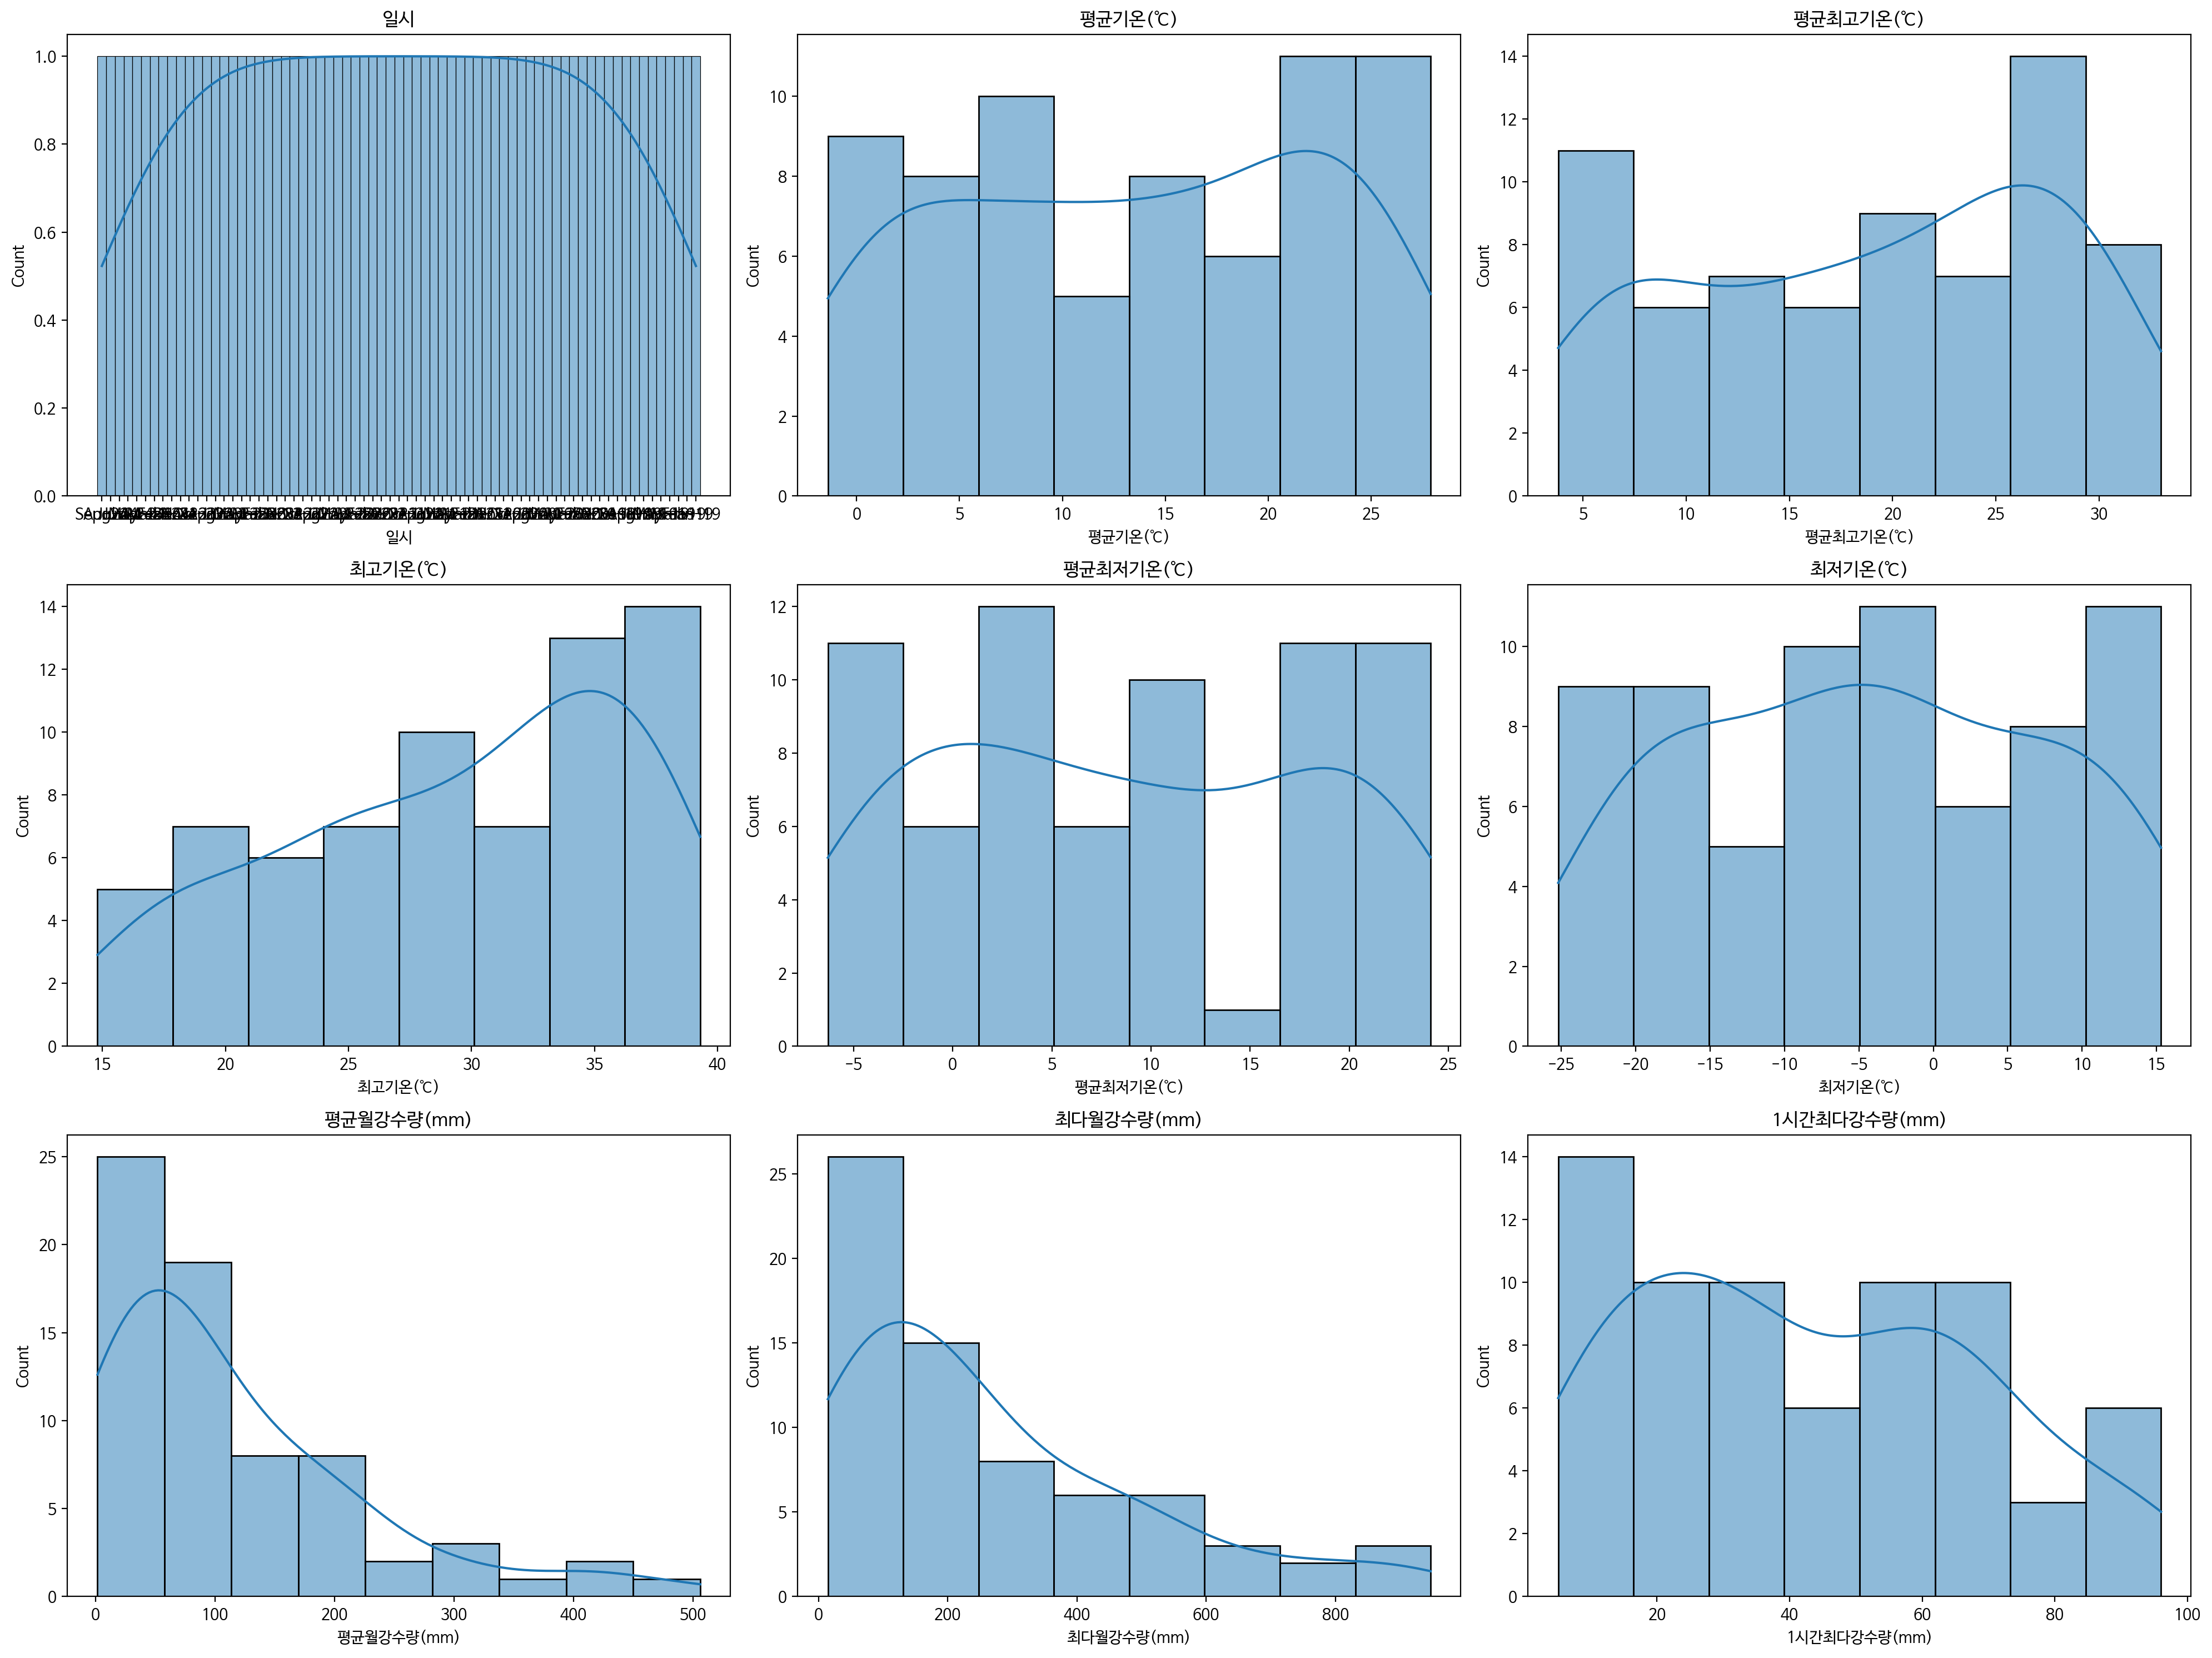

In [ ]:
# 히스토그램으로 각 변수의 분포 시각화

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for i, col in enumerate(kimchi_data.columns):
    if i < len(axes):
      sns.histplot(kimchi_data[col], kde=True, ax=axes[i])
      axes[i].set_title(col)

plt.tight_layout()
plt.show()

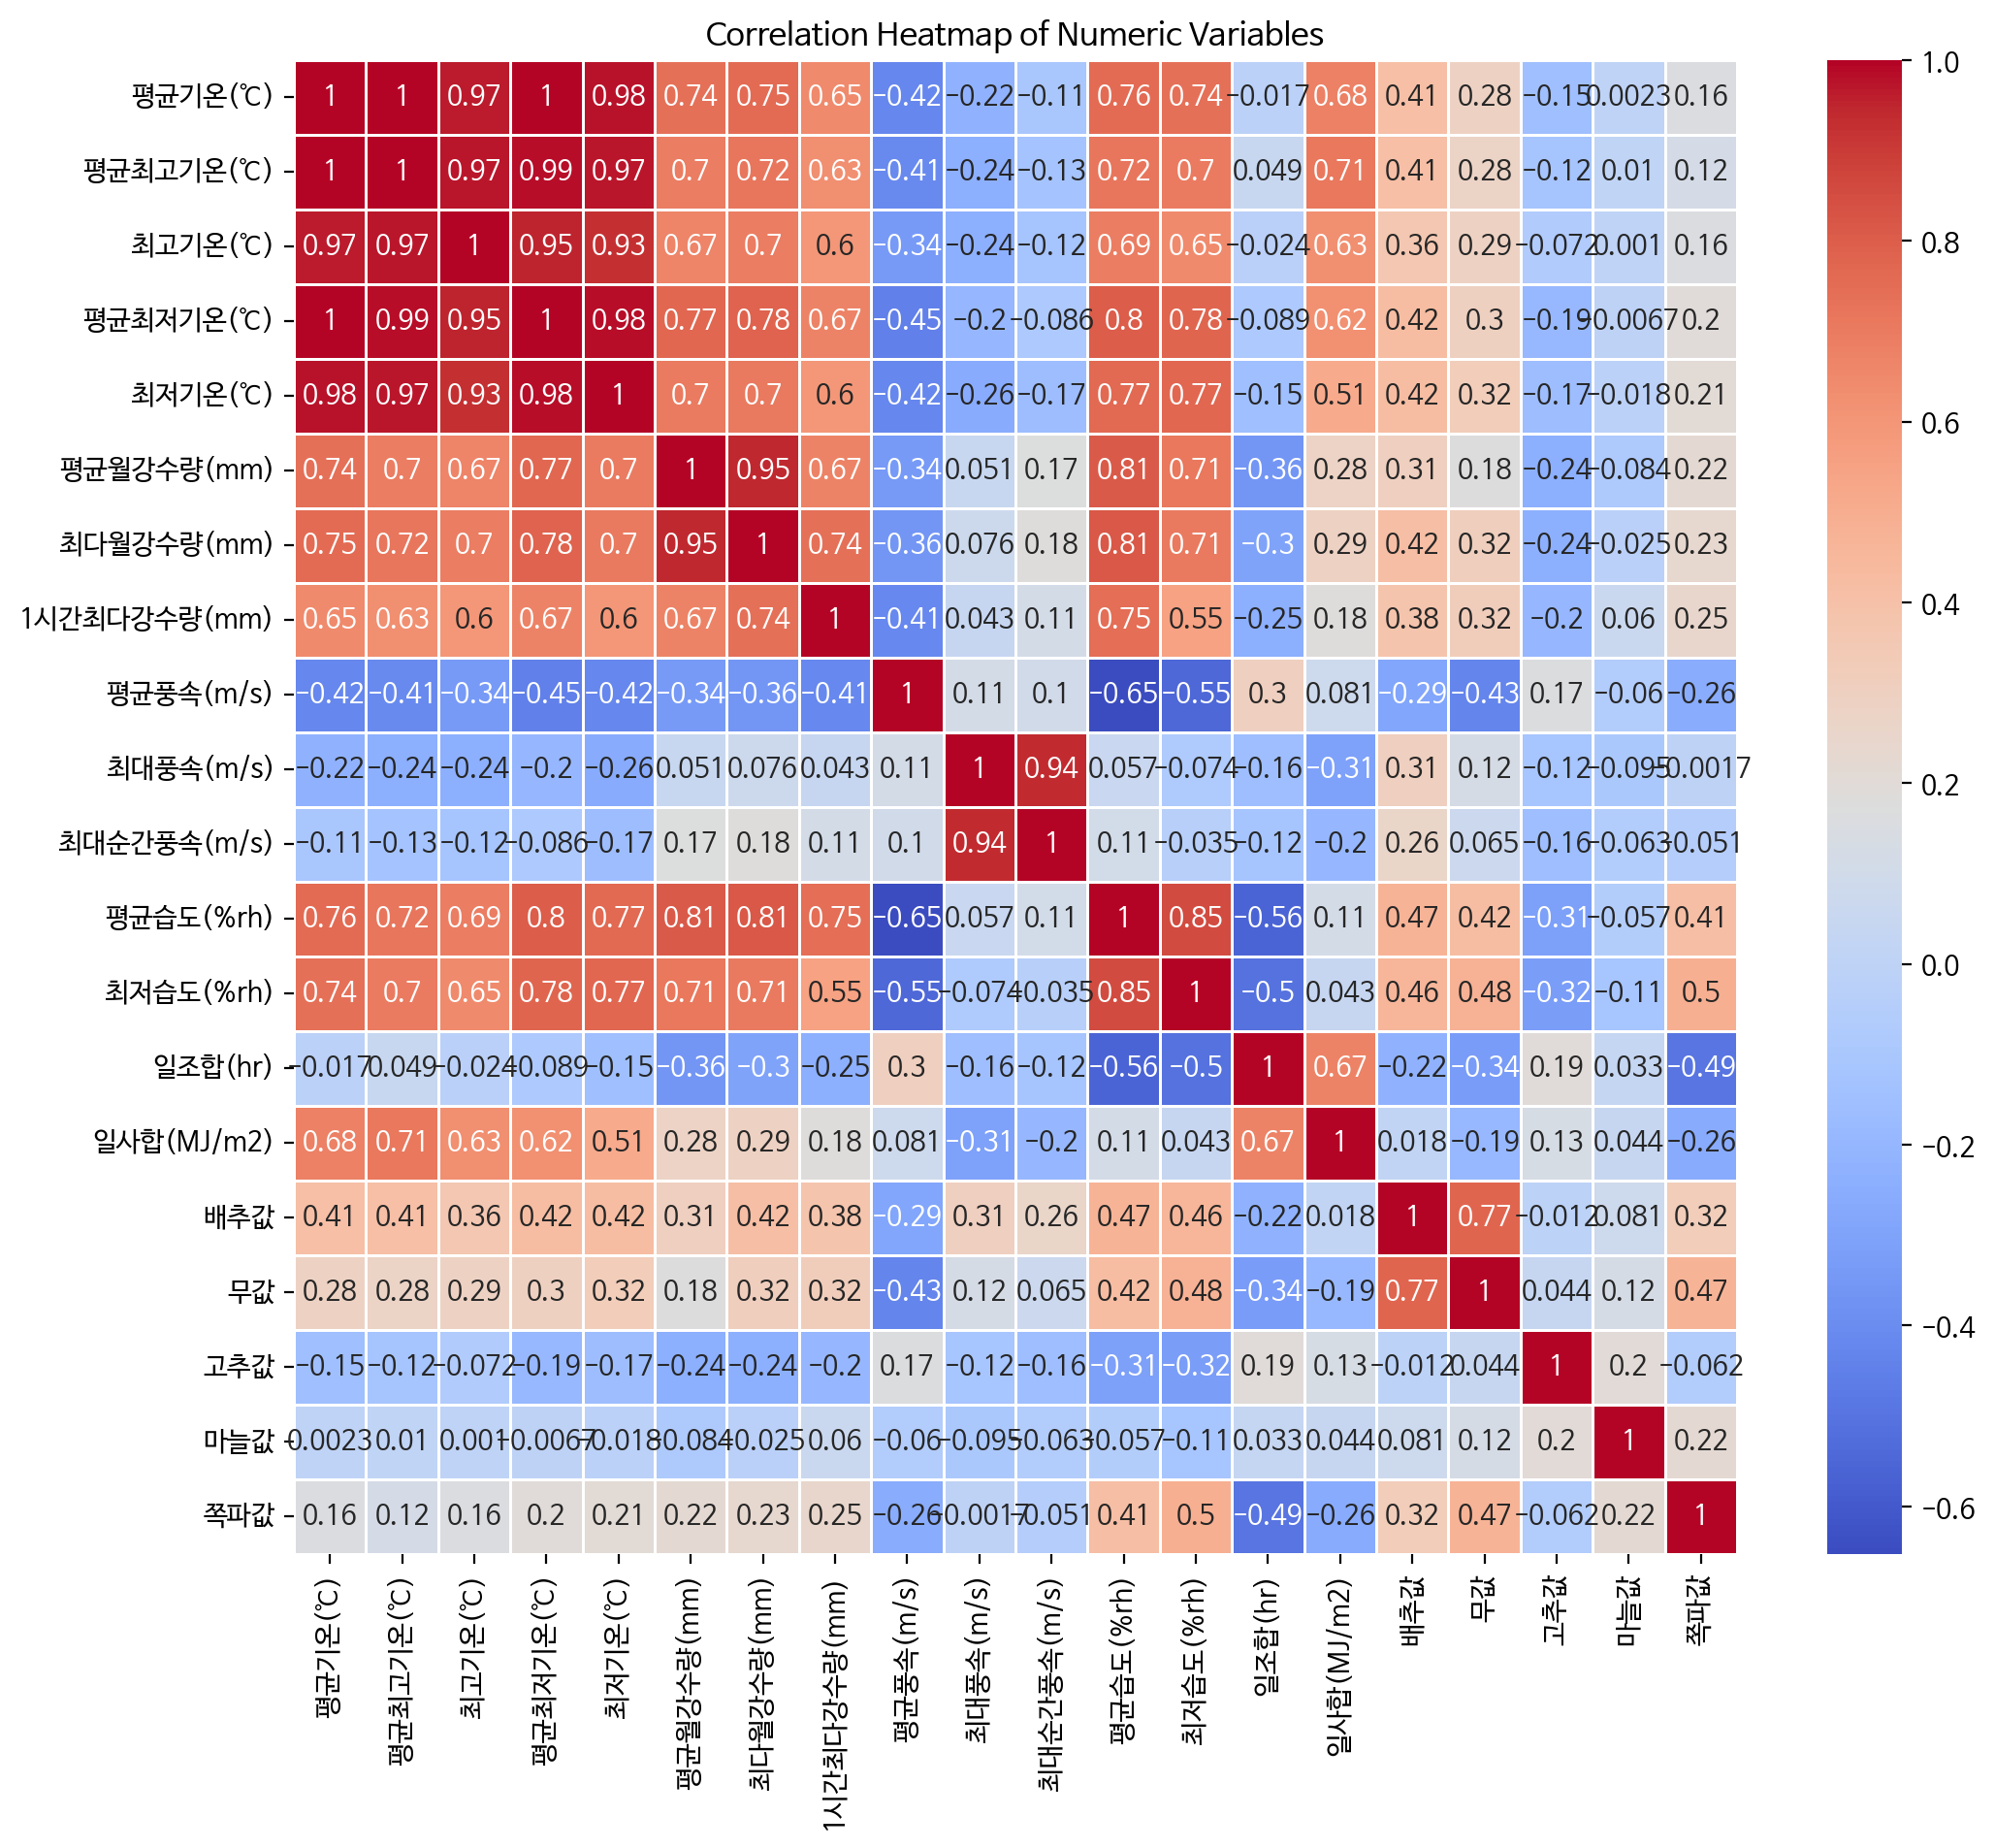

In [ ]:
# 상관관계 히트맵

plt.figure(figsize=(12, 10))
sns.heatmap(kimchi_data[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

In [ ]:
# 온도변수(평균기온, 최고기온 등)는 서로 높은 양의 상관관계를 보임(1에 가까움)
# 풍속 변수(평균풍속, 최대풍속 등)는 온도 관련 변수와 더 낮거나 심지어 음의 상관관계를 나타냄
# 습도(평균습도, 변동습도)는 온도와 적당한 상관관계를 가지며 풍속 변수와 반비례
# 강수량(평균월강수량, 최대강수량 등)은 온도와 약하거나 음의 상관관계가 있지만 일부 풍속 및 습도 변수와는 중간 정도의 상관관계가 있음
# 일사량(일사량)과 기온은 중간 정도의 양의 상관관계를 보인 반면, 다른 요인들과는 약한 상관관계를 보임

## 데이터 전처리, 결측값 처리, 탐색적 데이터 분석 수행


처리된 데이터 샘플:
          일시    평균기온(℃)  평균최고기온(℃)  최고기온(℃)  평균최저기온(℃)  최저기온(℃)  평균월강수량(mm)  \
0 2024-09-01  13.501471  18.983824     35.4   8.705882     13.5         1.8   
1 2024-08-01  27.900000  33.000000     39.3  24.100000     14.6        87.3   
2 2024-07-01  26.200000  29.900000     37.7  23.300000     13.6       379.2   
3 2024-06-01  22.700000  28.400000     37.7  17.500000      2.0       130.5   
4 2024-05-01  17.700000  24.000000     33.4  11.800000     -1.3       117.6   

   최다월강수량(mm)  1시간최다강수량(mm)  평균풍속(m/s)  ...  최저습도(%rh)  일조합(hr)  일사합(MJ/m2)  \
0        23.0          13.9   1.766176  ...         33     18.3       50.08   
1       232.9          96.0   1.500000  ...         16    246.9      612.01   
2       759.5          93.5   2.000000  ...         29    140.4      479.76   
3       288.2          38.1   1.600000  ...          8    248.1      669.09   
4       323.8          33.0   1.900000  ...          6    269.6      696.86   

    배추값    무값   고추값    마늘값    쪽파값  Ye

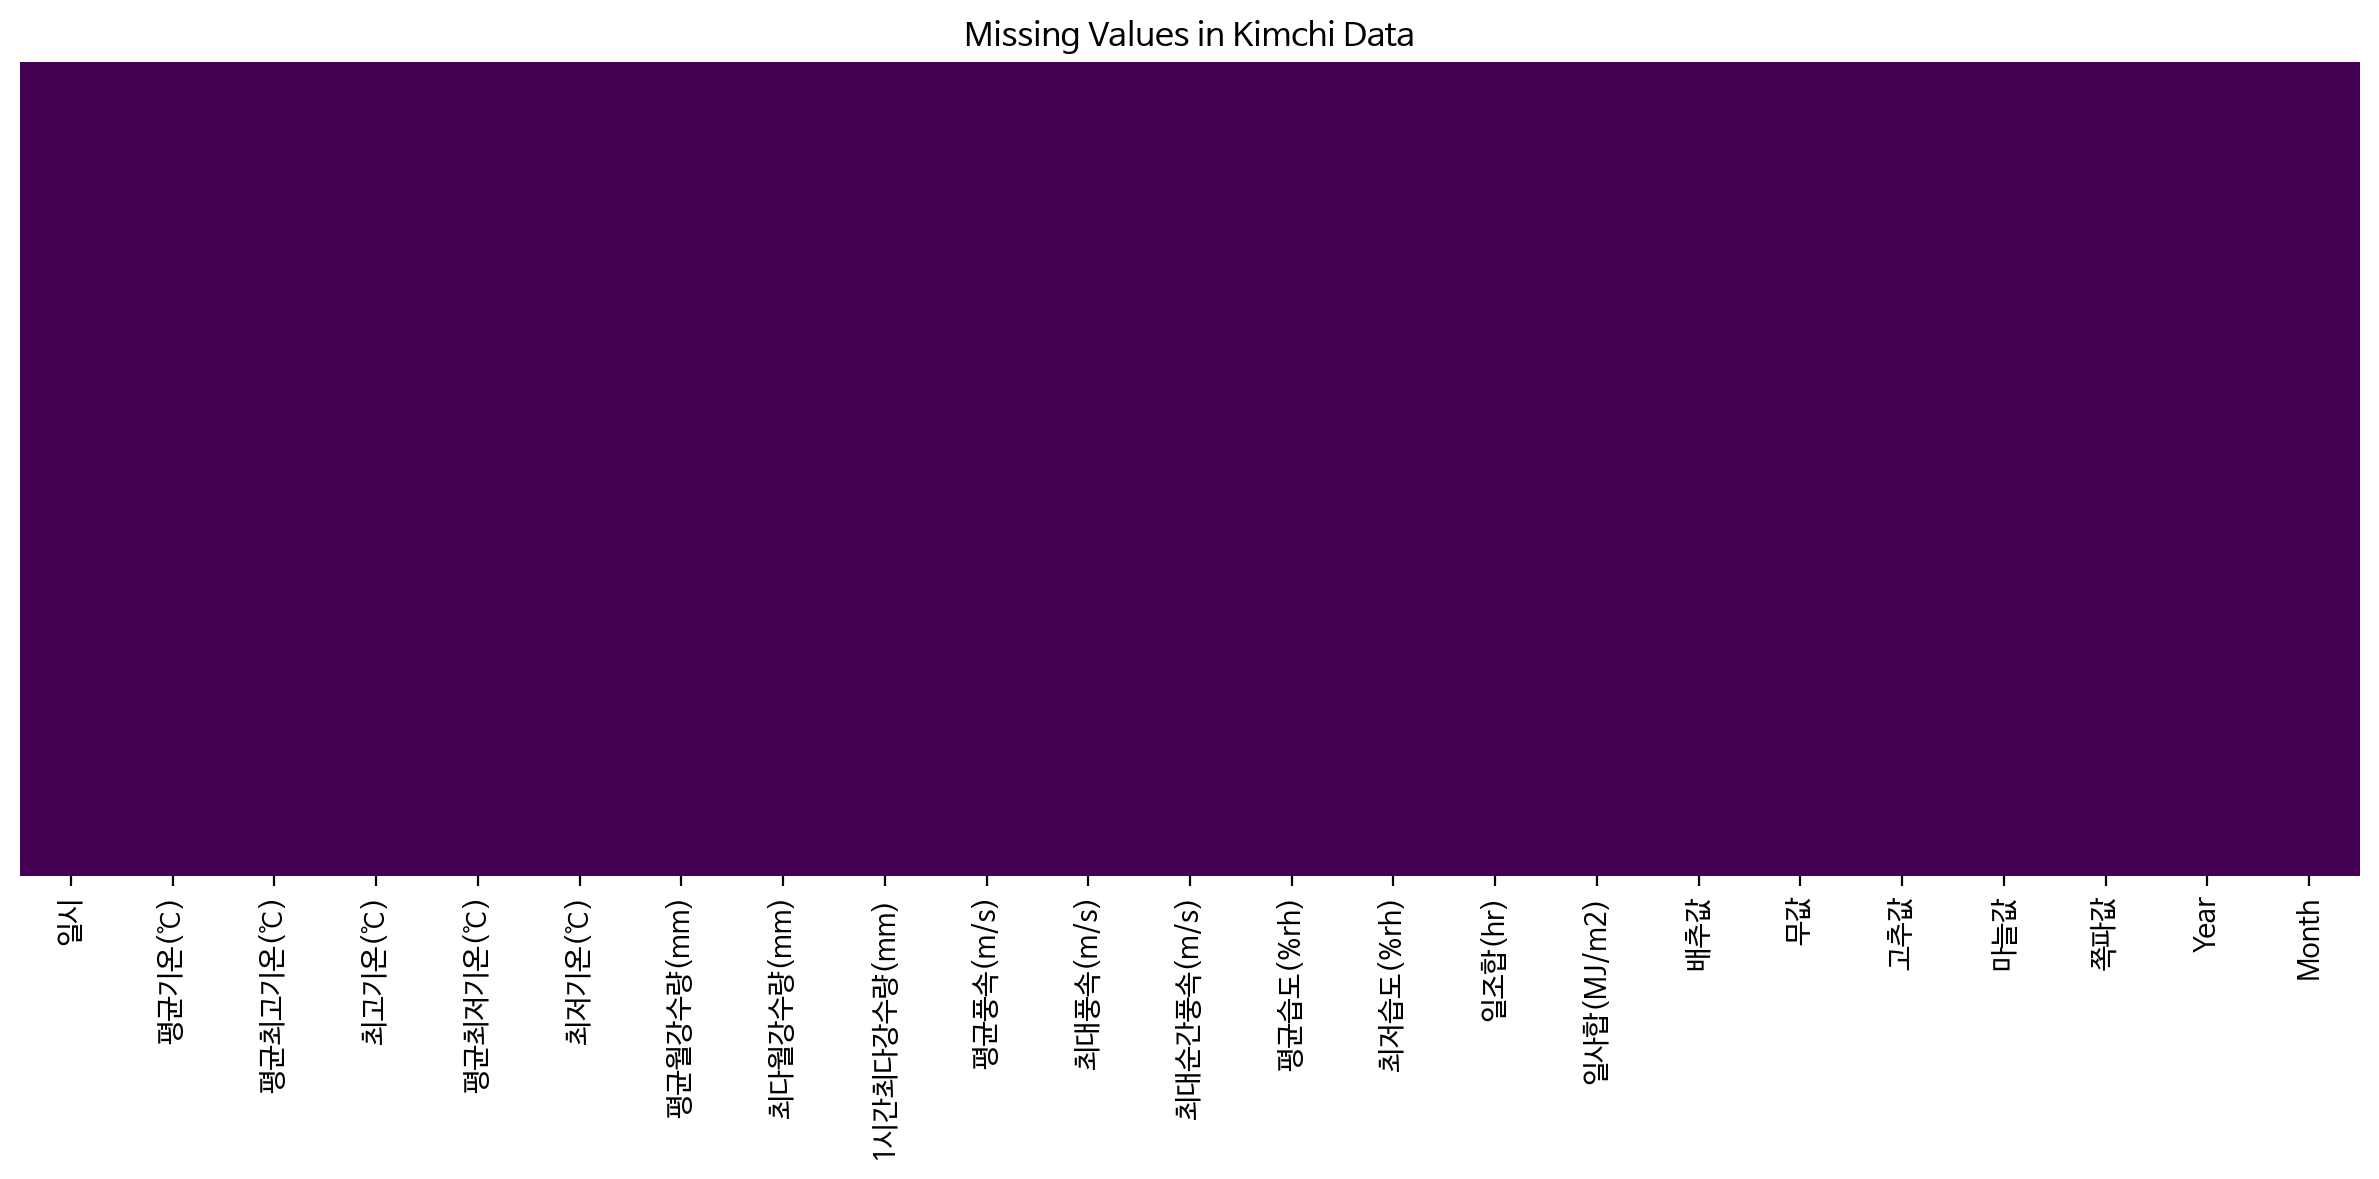


수정된 데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   일시            69 non-null     datetime64[ns]
 1   평균기온(℃)       69 non-null     float64       
 2   평균최고기온(℃)     69 non-null     float64       
 3   최고기온(℃)       69 non-null     float64       
 4   평균최저기온(℃)     69 non-null     float64       
 5   최저기온(℃)       69 non-null     float64       
 6   평균월강수량(mm)    69 non-null     float64       
 7   최다월강수량(mm)    69 non-null     float64       
 8   1시간최다강수량(mm)  69 non-null     float64       
 9   평균풍속(m/s)     69 non-null     float64       
 10  최대풍속(m/s)     69 non-null     float64       
 11  최대순간풍속(m/s)   69 non-null     float64       
 12  평균습도(%rh)     69 non-null     float64       
 13  최저습도(%rh)     69 non-null     int64         
 14  일조합(hr)       69 non-null     float64       
 15  일사합(MJ/m2)    69 non-null 

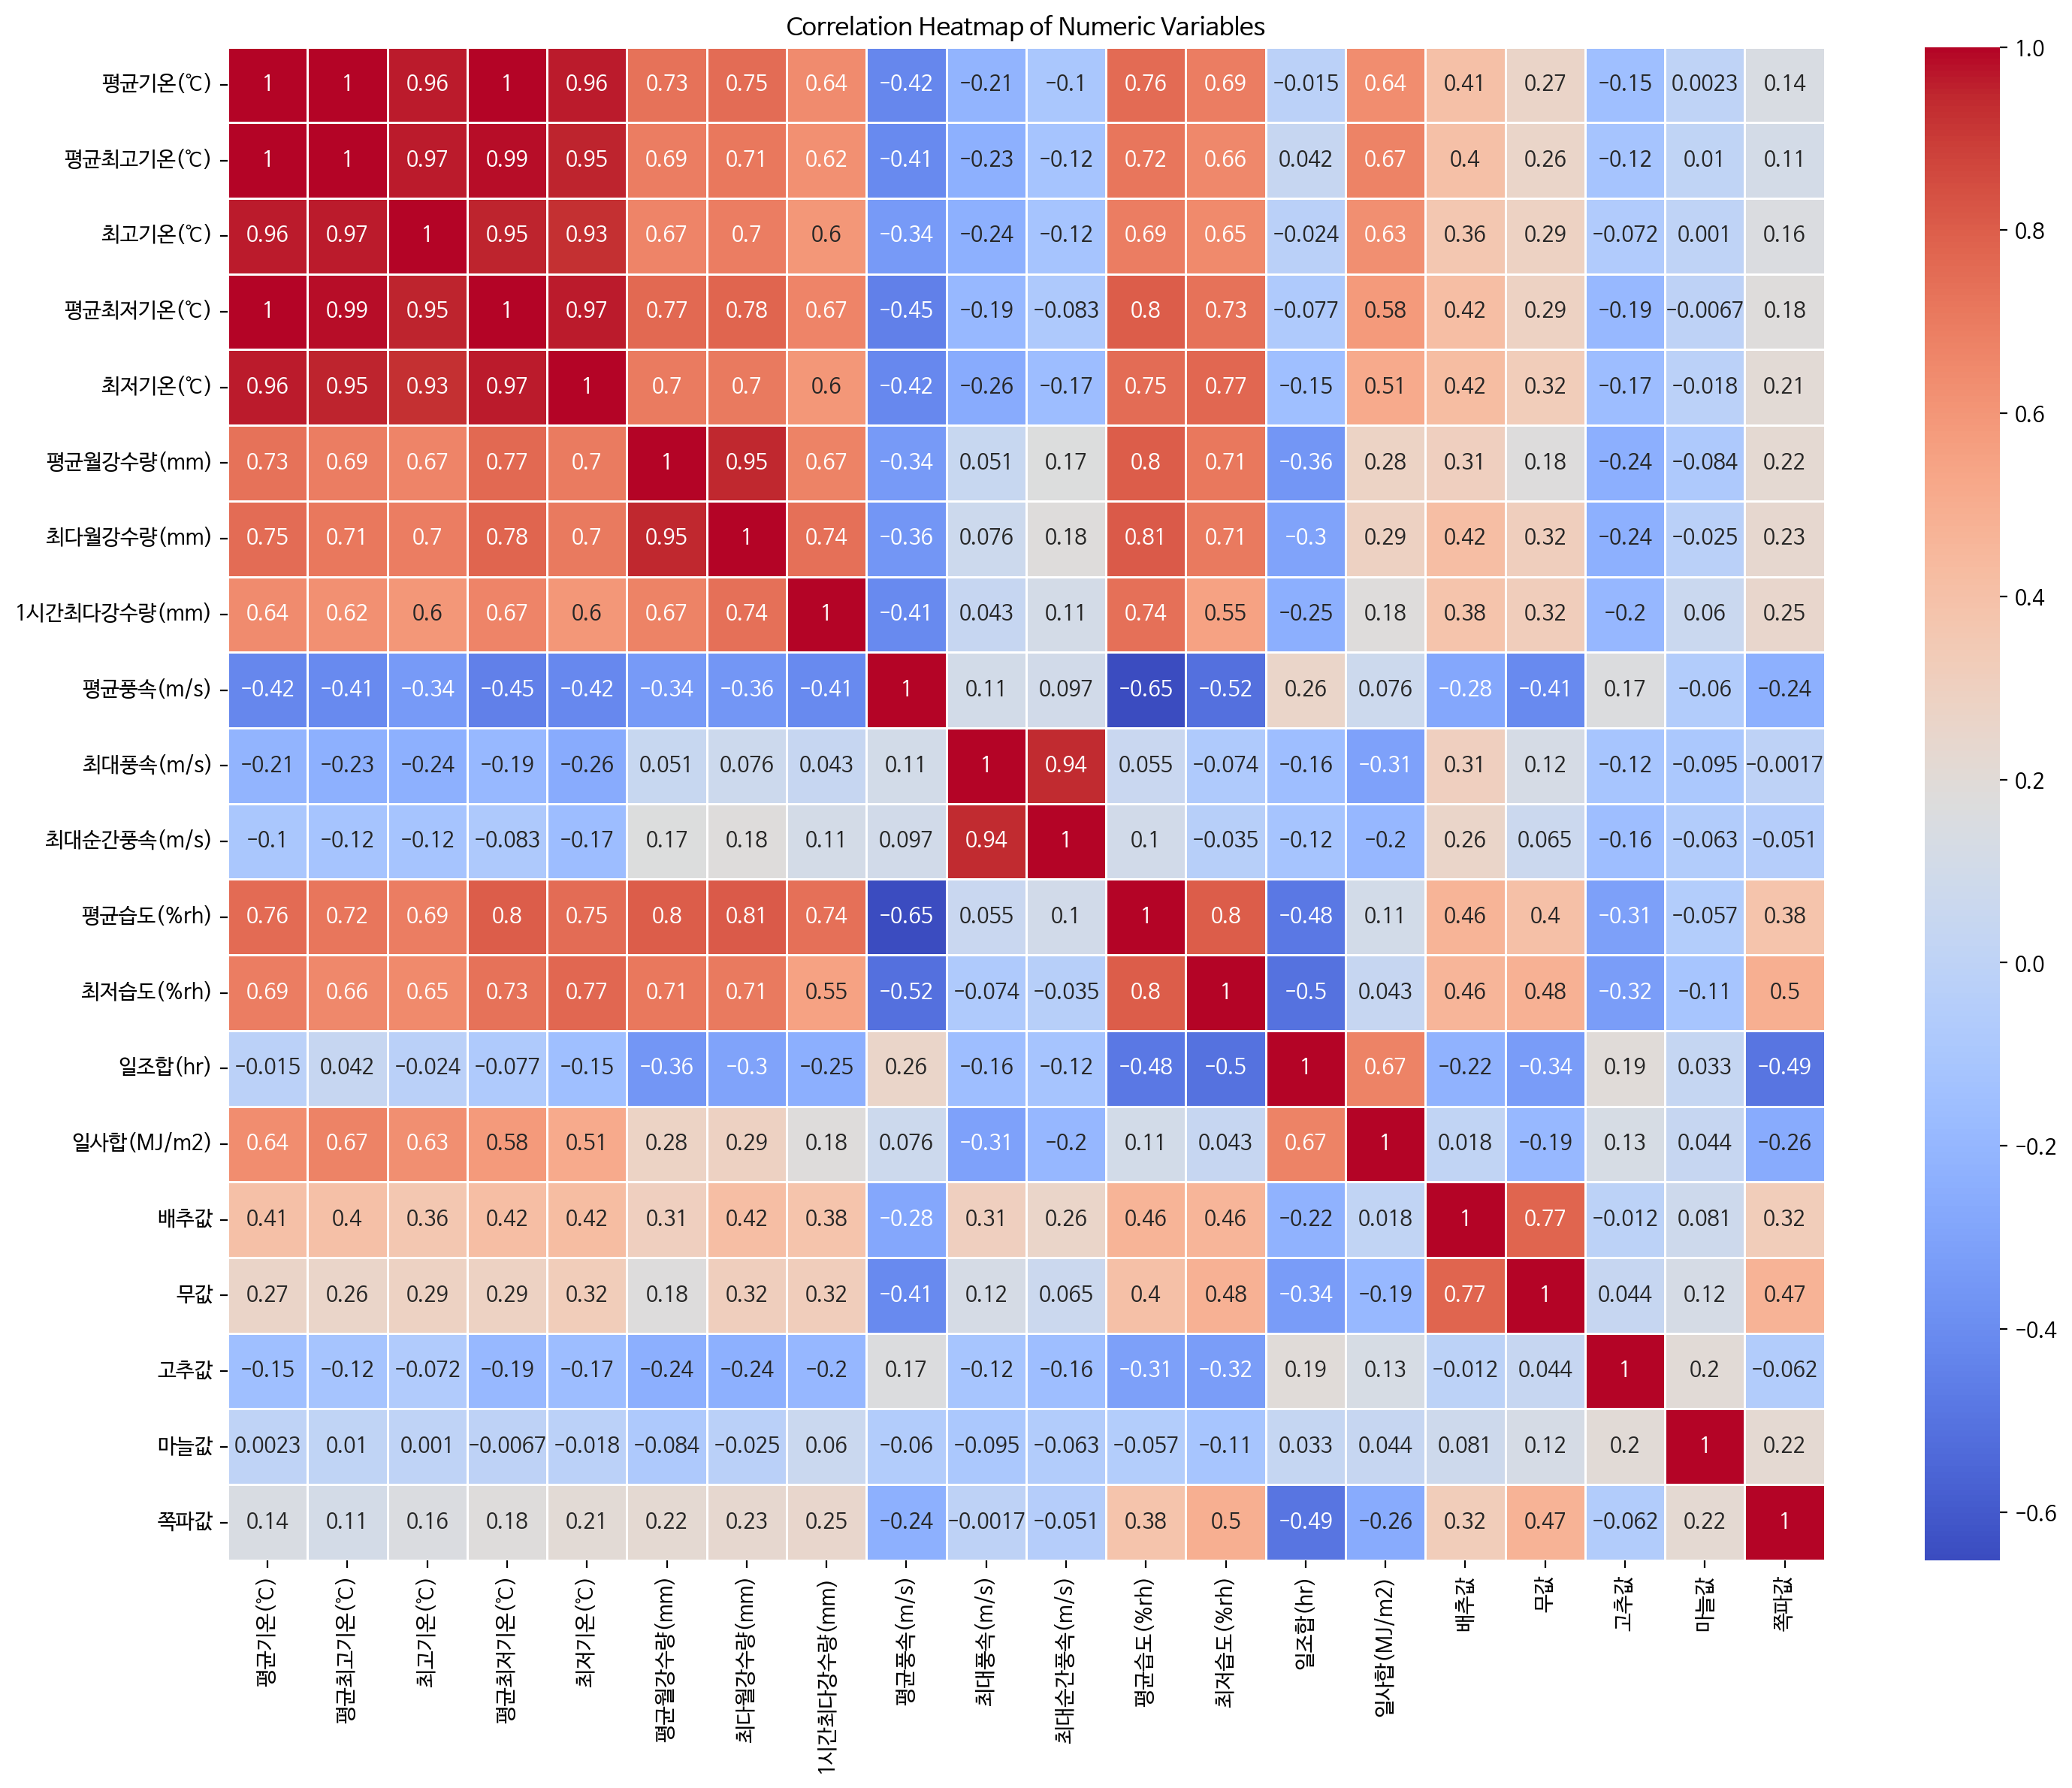

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# '일시' 열을 날짜형으로 변환
kimchi_data['일시'] = pd.to_datetime(kimchi_data['일시'], format='%b-%y')

# 연도와 월을 별도의 특징(feature)으로 분리
kimchi_data['Year'] = kimchi_data['일시'].dt.year
kimchi_data['Month'] = kimchi_data['일시'].dt.month

# 수치형 열만 선택
numeric_columns = kimchi_data.select_dtypes(include=['float64', 'int64']).columns

# 수치형 데이터에 대해서만 결측값 처리
kimchi_data[numeric_columns] = kimchi_data[numeric_columns].fillna(kimchi_data[numeric_columns].mean())

# 데이터 확인
print("\n처리된 데이터 샘플:")
print(kimchi_data.head())

# 결측값 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(kimchi_data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values in Kimchi Data')
plt.tight_layout()
plt.show()

# 수정된 데이터프레임 구조 확인
print("\n수정된 데이터프레임 정보:")
print(kimchi_data.info())

# 상관관계 분석
correlation = kimchi_data[numeric_columns].corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(15, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

## 특징과 목표 변수 설정

학습용 데이터 크기: (55, 6) (55, 4)
테스트용 데이터 크기: (14, 6) (14, 4)


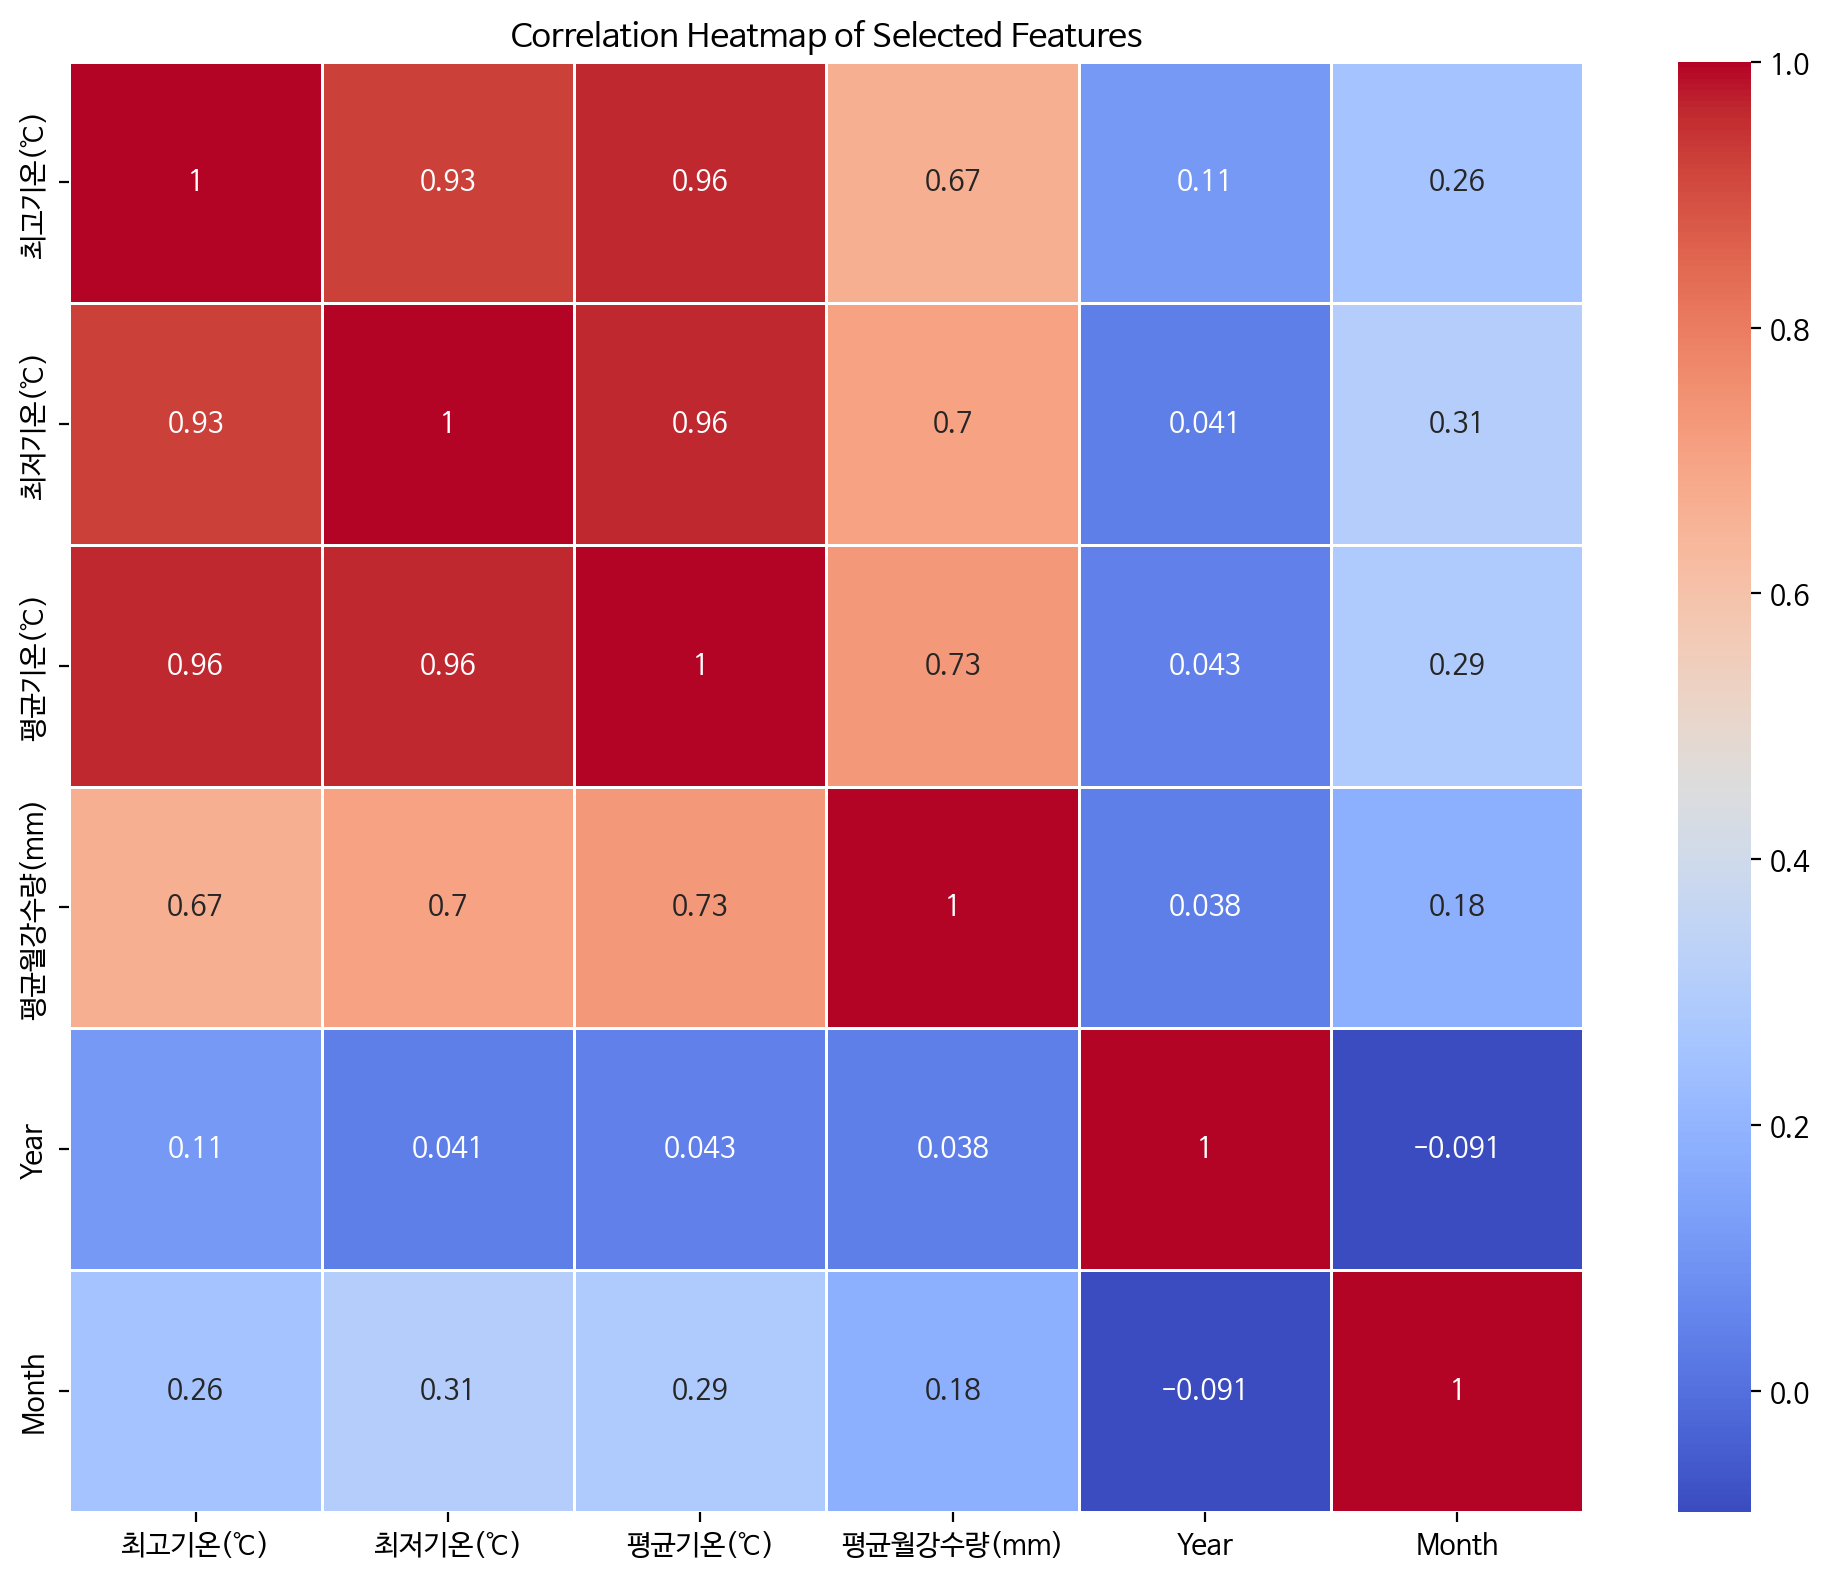

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 특징 (features)와 목표 (targets) 설정
X = kimchi_data[['최고기온(℃)', '최저기온(℃)', '평균기온(℃)', '평균월강수량(mm)', 'Year', 'Month']]
y = kimchi_data[['배추값', '무값', '쪽파값', '고추값']]  # 각 김치 재료 가격이 목표 변수

# 학습용 데이터와 테스트용 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 데이터 분할 결과 확인
print("학습용 데이터 크기:", X_train.shape, y_train.shape)
print("테스트용 데이터 크기:", X_test.shape, y_test.shape)

# 선택된 특징들의 상관관계 확인
correlation = X.corr()

# 상관관계 히트맵 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.tight_layout()
plt.show()

In [ ]:
# 우리가 가진 69개의 데이터 중 55개를 학습에 사용하고, 14개를 테스트에 사용할 예정
# 각 데이터는 6가지 날씨 관련 정보를 가지고 있고, 4가지 김치 재료의 가격을 예측하려고 함

## 모델 학습(Random Forest Regressor)

배추값 - MAE: 1555.38, RMSE: 1784.87
무값 - MAE: 522.44, RMSE: 643.64
쪽파값 - MAE: 2267.70, RMSE: 2585.21
고추값 - MAE: 336.62, RMSE: 424.76


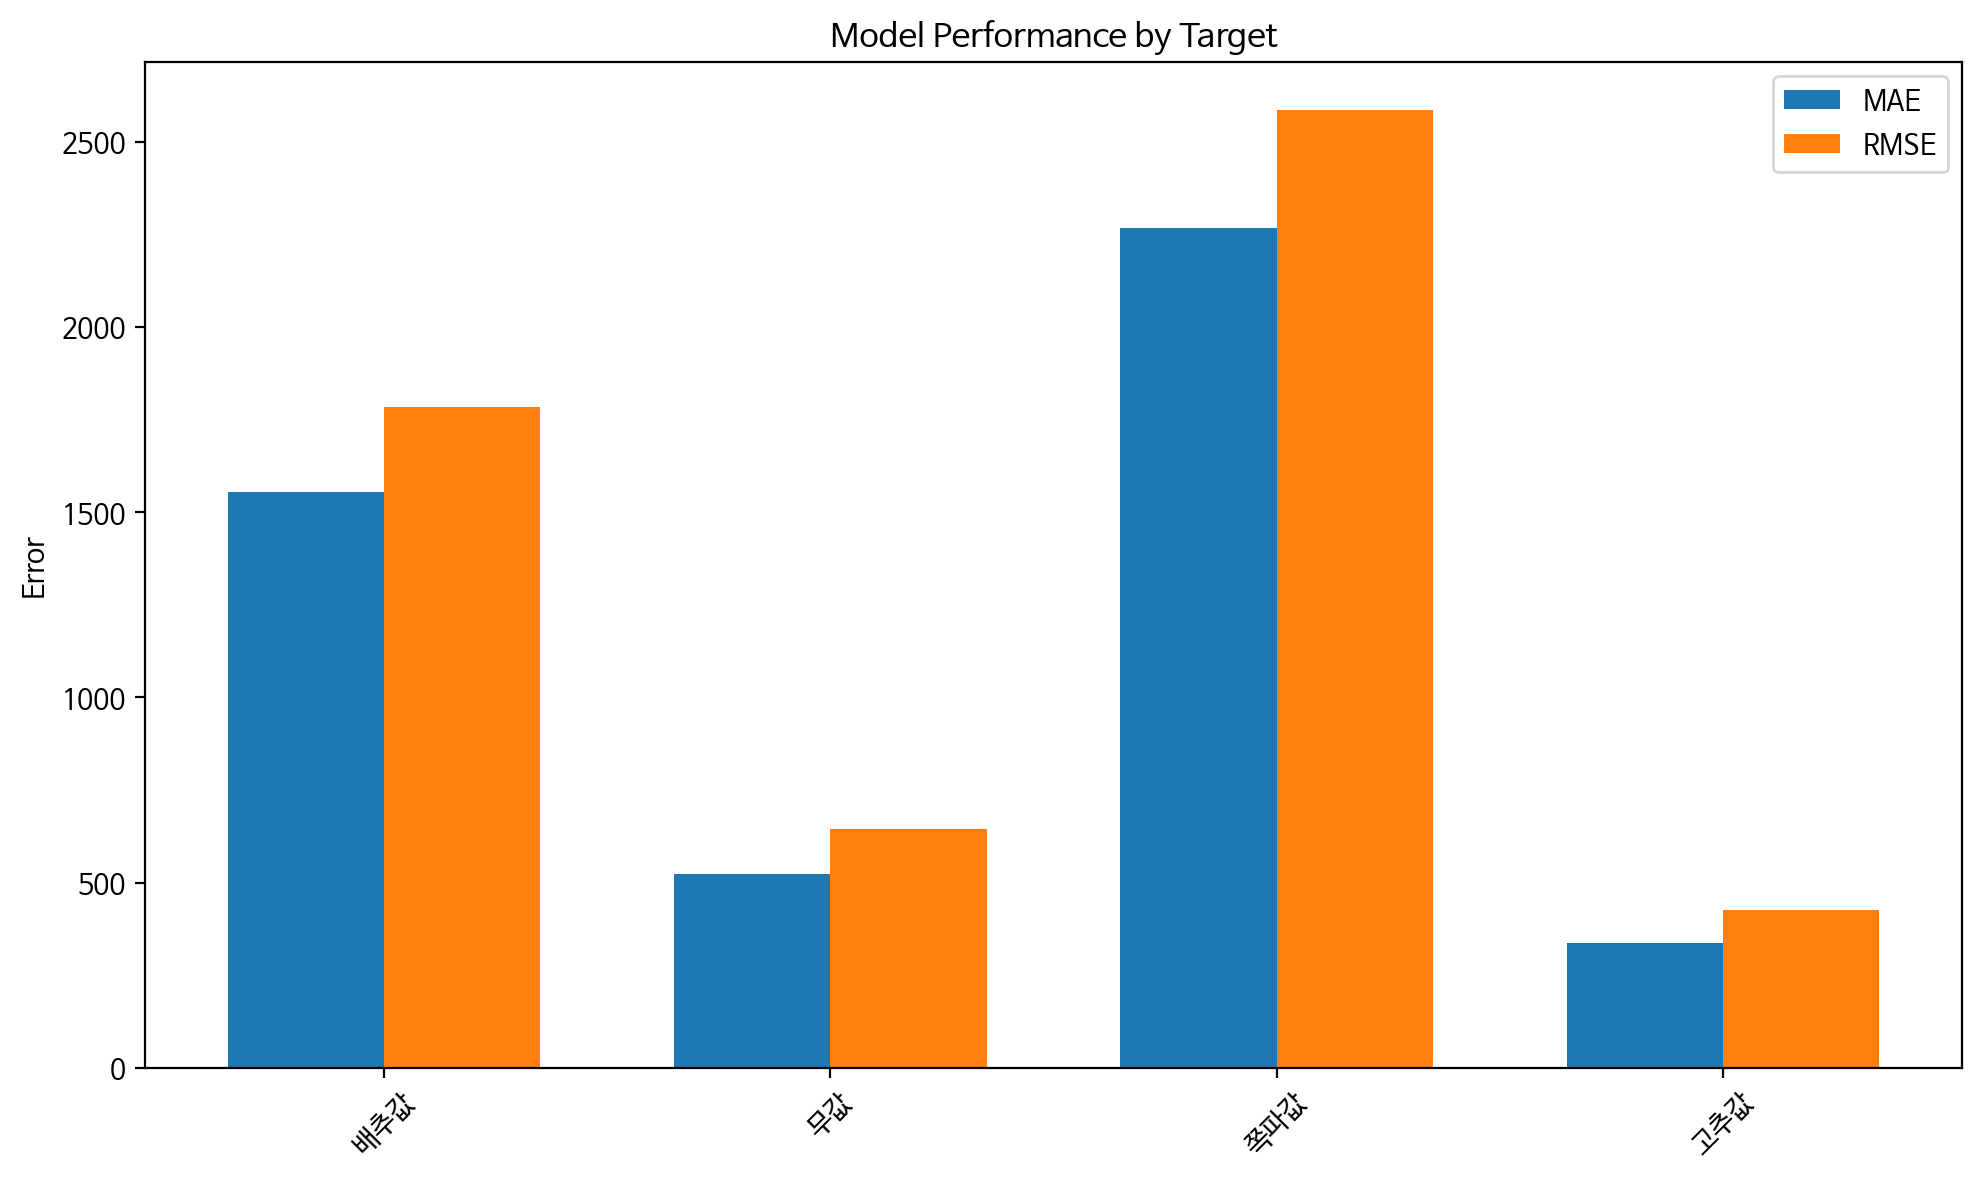

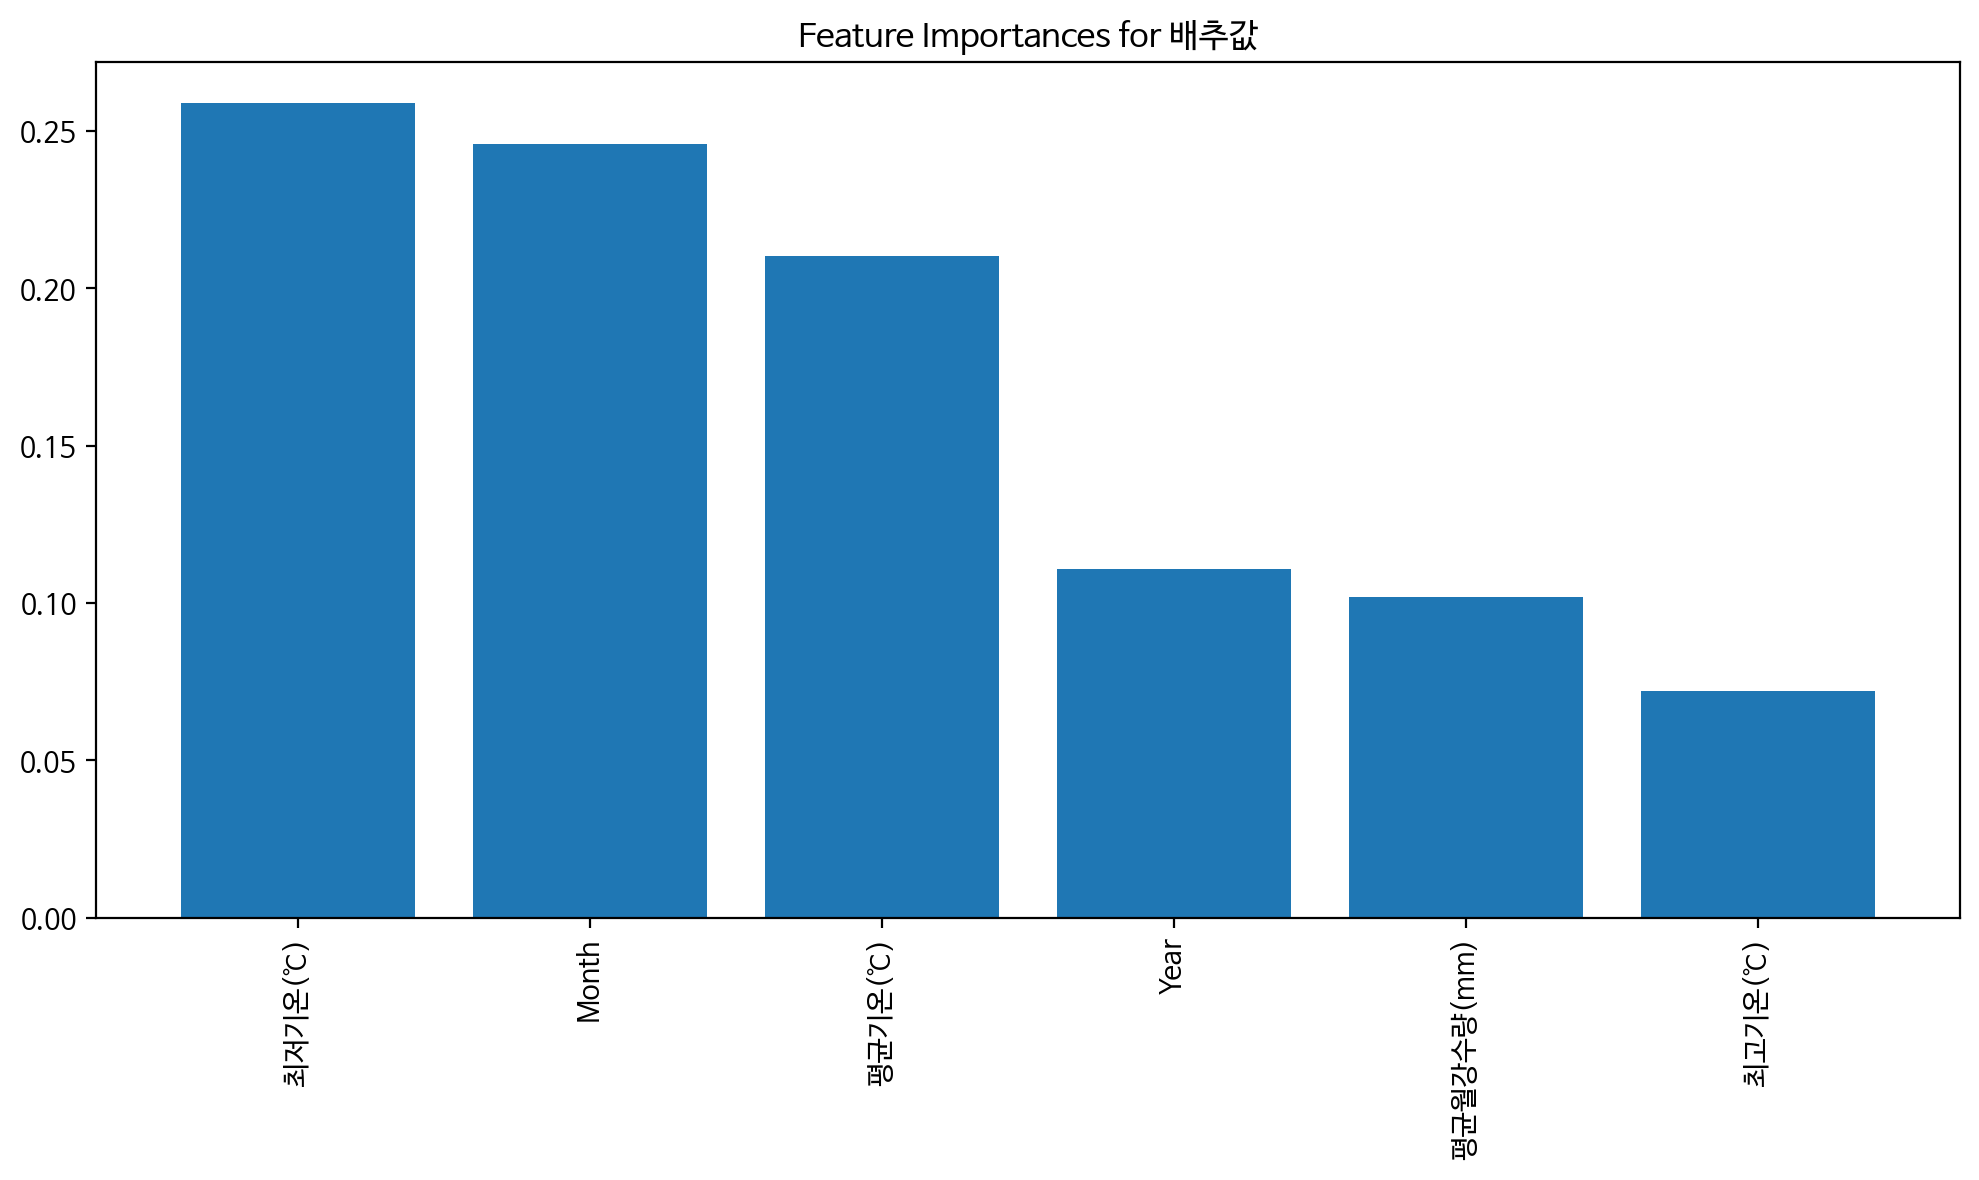

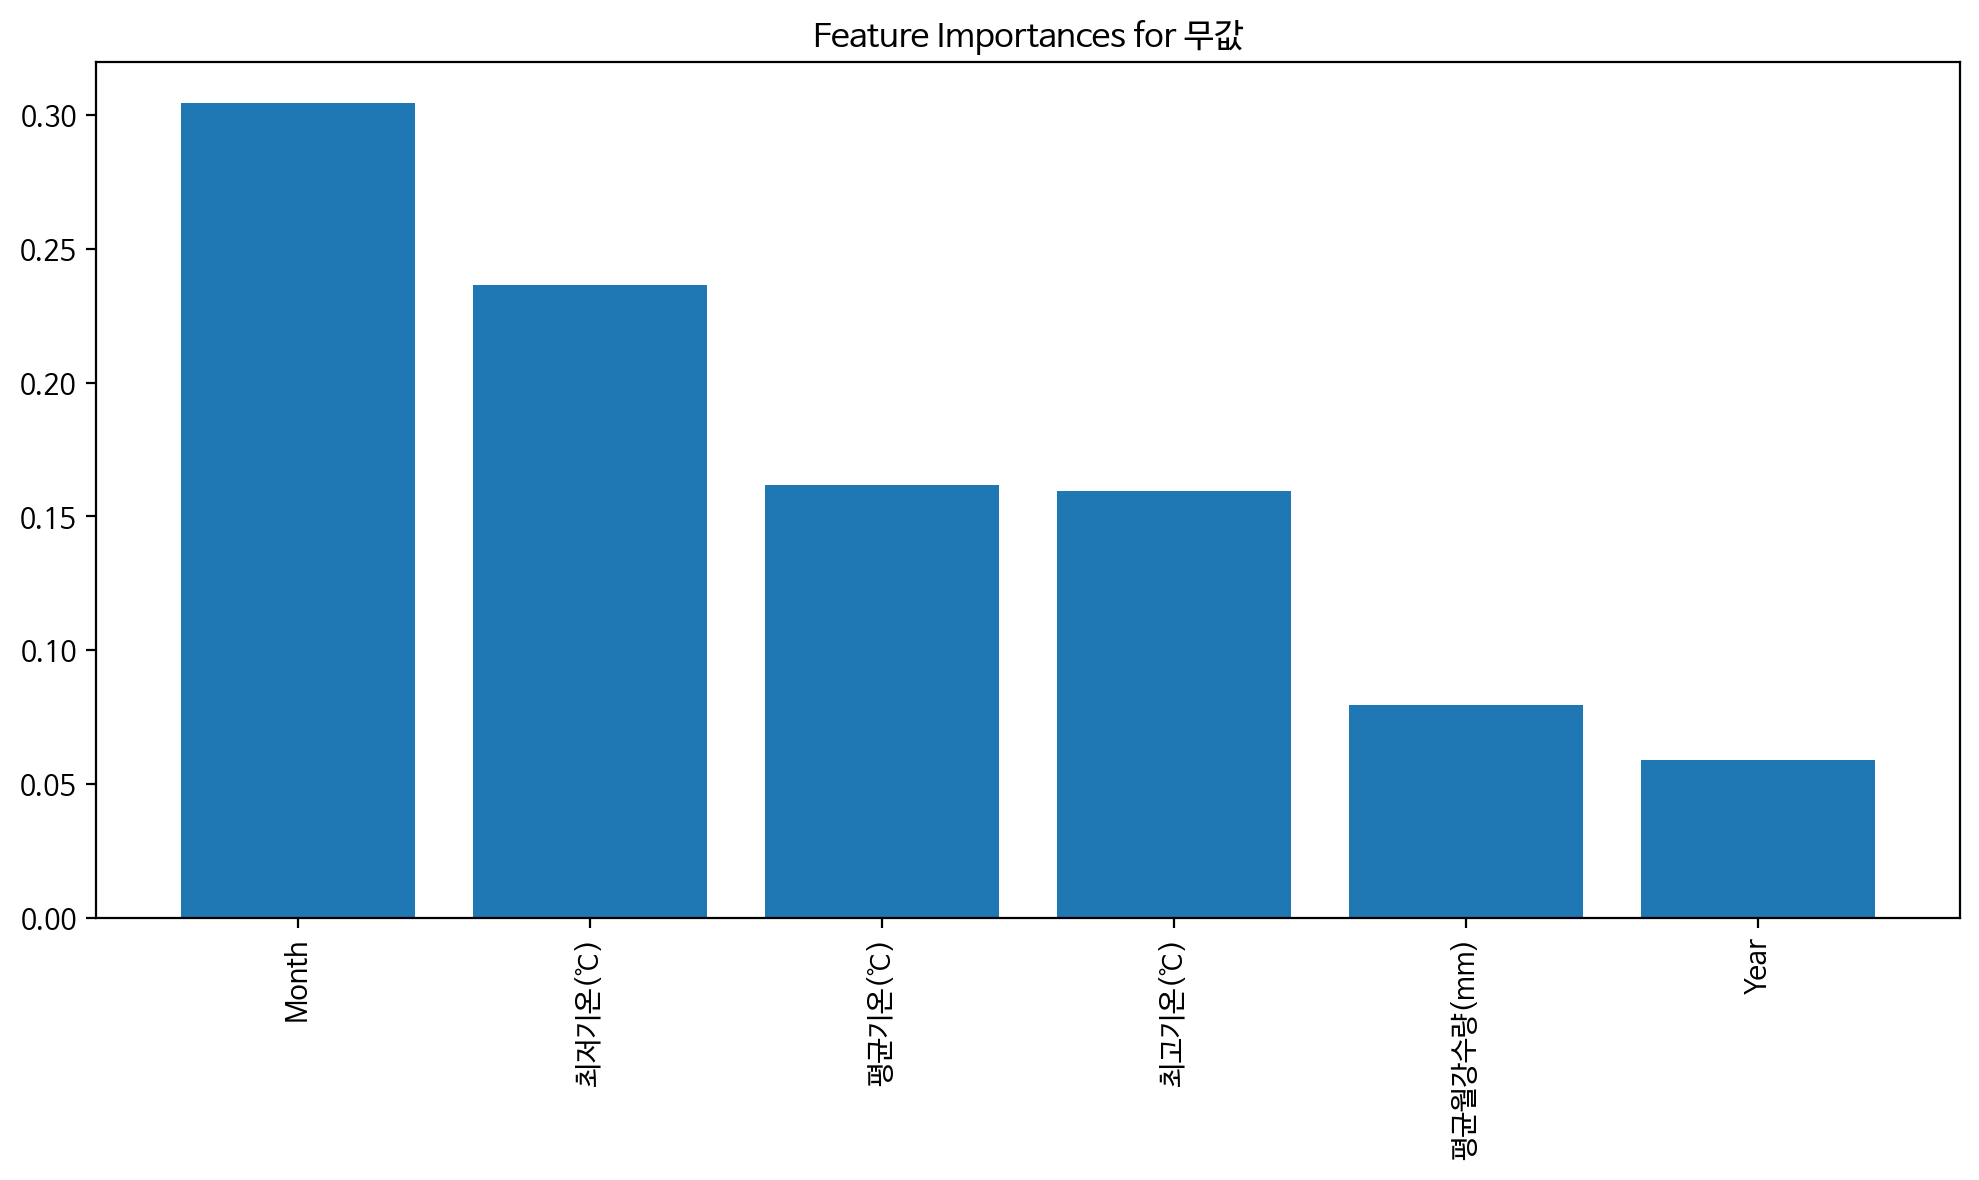

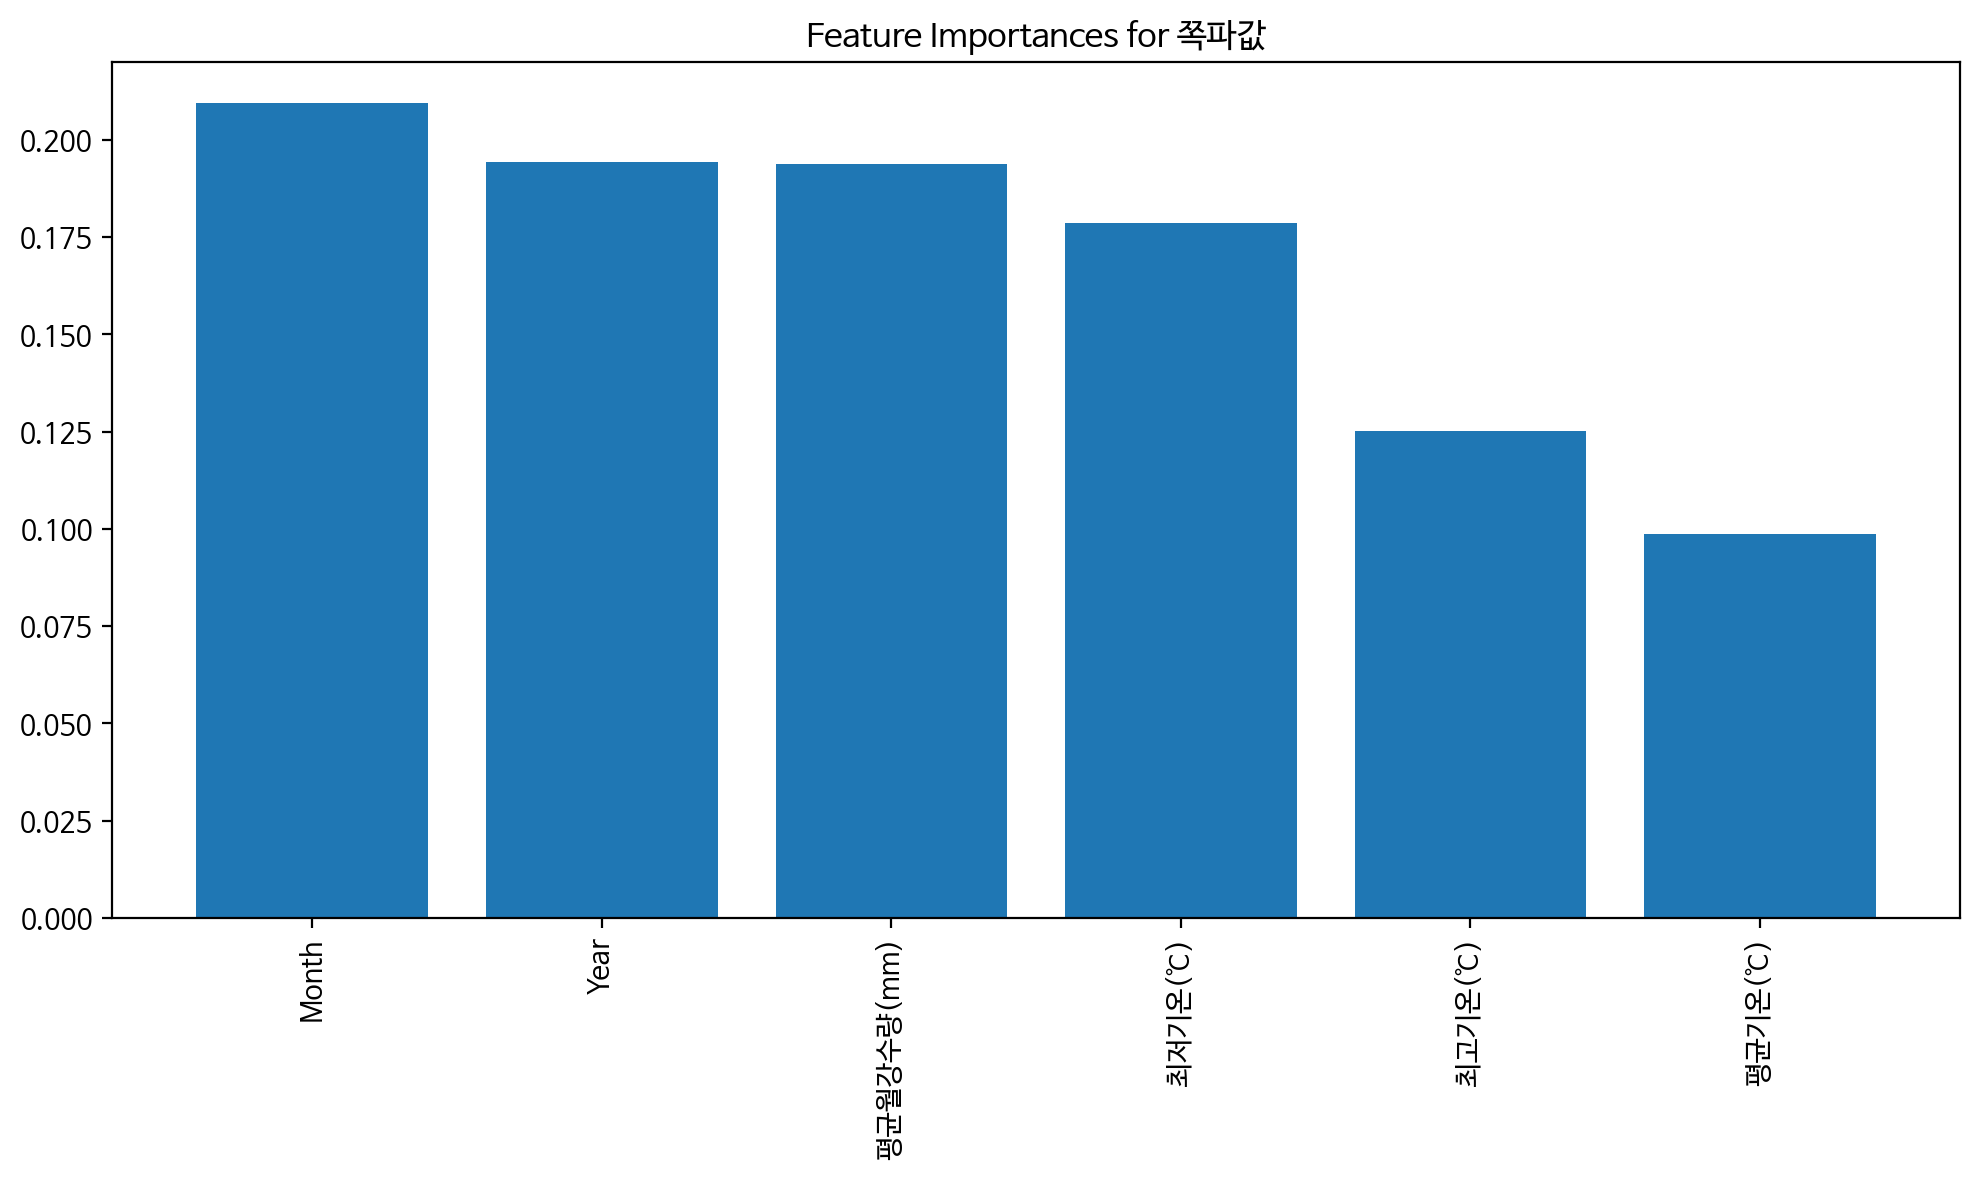

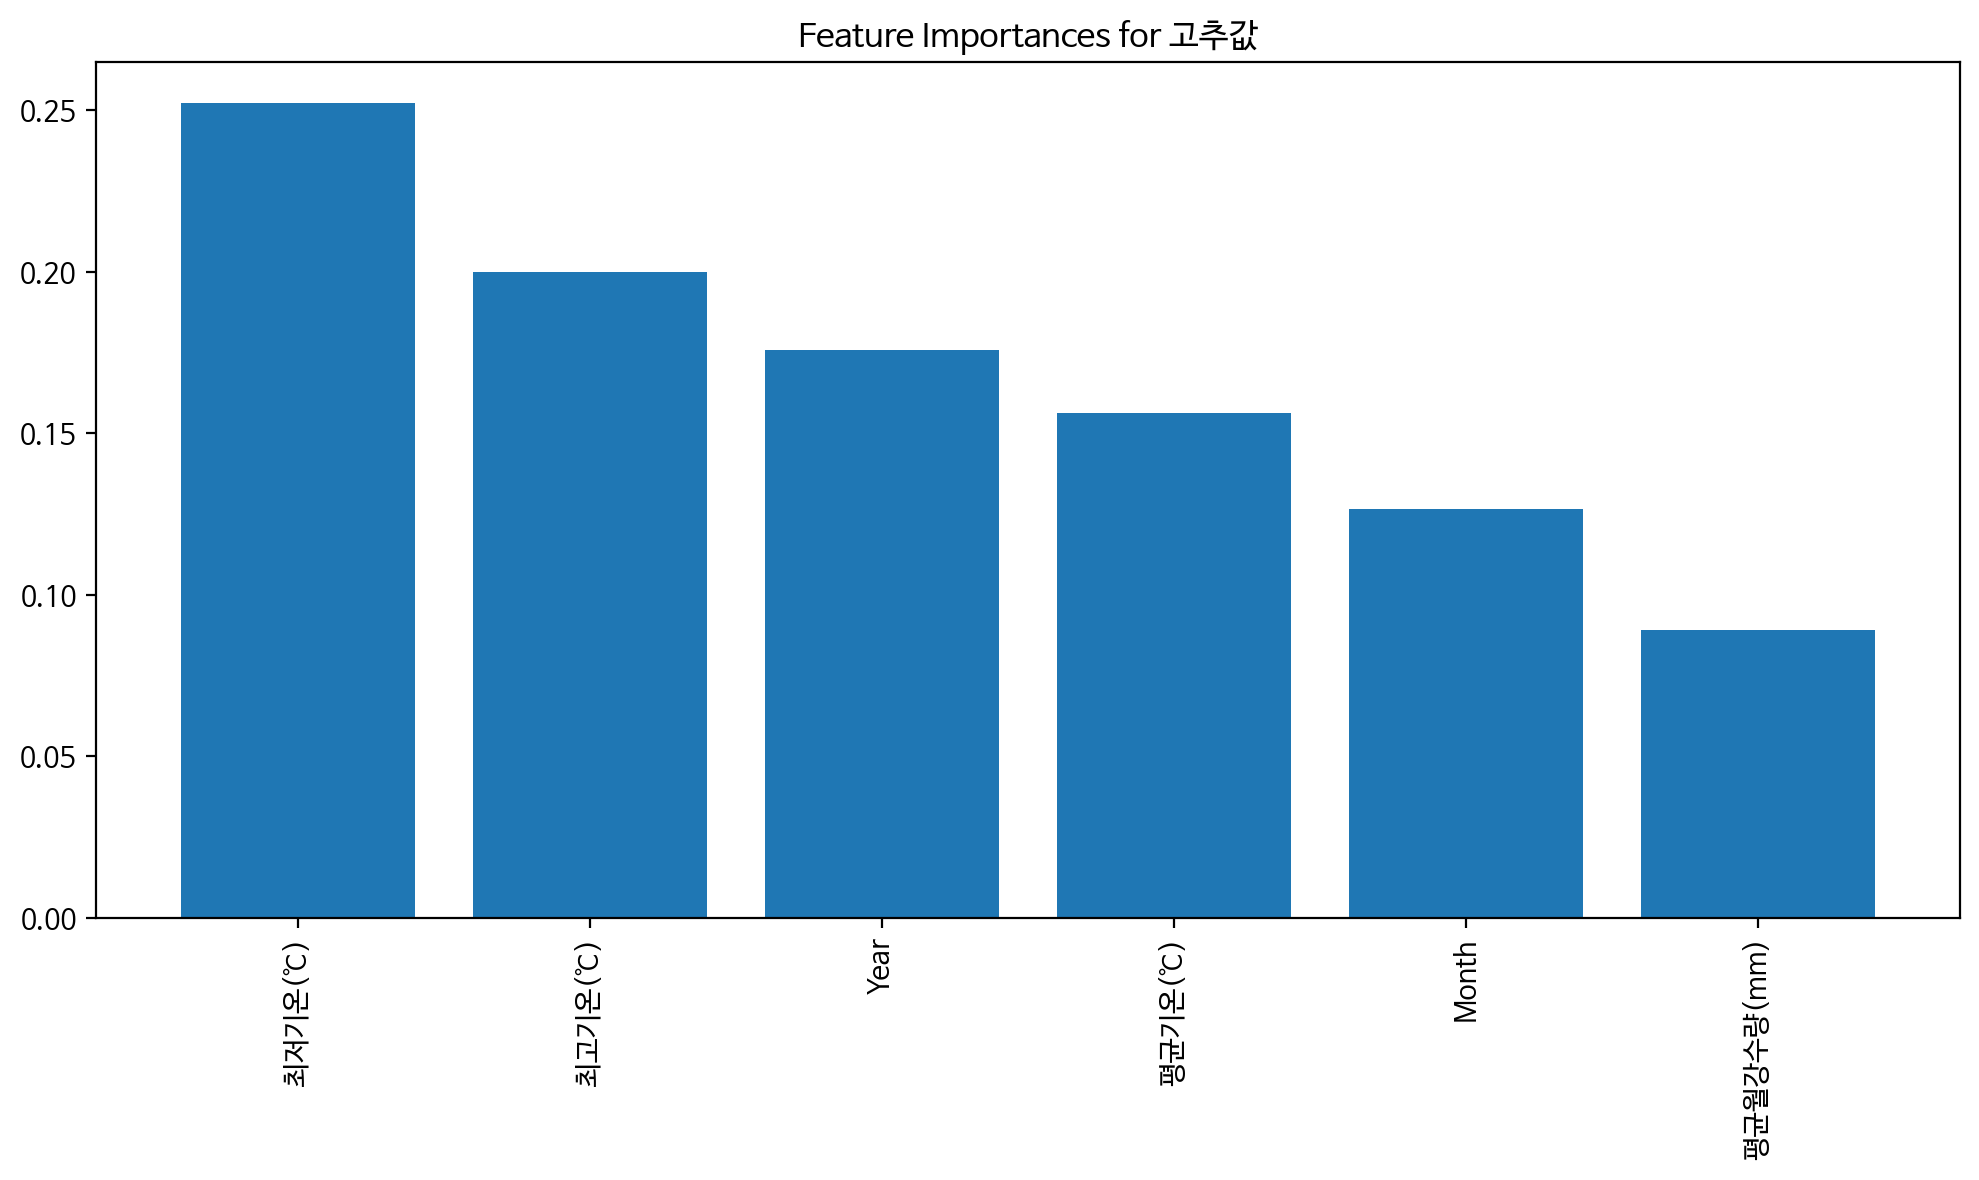

In [ ]:
from sklearn.ensemble import RandomForestRegressor # 예측모델
from sklearn.metrics import mean_absolute_error, mean_squared_error # 모델성능평가
import numpy as np #수학계산
import matplotlib.pyplot as plt #그래프그리기
#

# 각 목표 변수별로 Random Forest 모델을 학습
models = {}
results = {}
targets = y.columns

for target in targets:
    # 모델 초기화
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    # 모델 학습
    rf.fit(X_train, y_train[target])
    models[target] = rf
    # 예측
    predictions = rf.predict(X_test)
    # 평가 (MAE, RMSE 계산)
    mae = mean_absolute_error(y_test[target], predictions)
    rmse = np.sqrt(mean_squared_error(y_test[target], predictions))

    results[target] = {'MAE': mae, 'RMSE': rmse}

    # 결과 출력
    print(f"{target} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# 결과 시각화(각 김치 재료별로 MAE와 RMSE를 막대 그래프로 표시)
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(targets))
width = 0.35

ax.bar(x - width/2, [results[t]['MAE'] for t in targets], width, label='MAE')
ax.bar(x + width/2, [results[t]['RMSE'] for t in targets], width, label='RMSE')

ax.set_ylabel('Error')
ax.set_title('Model Performance by Target')
ax.set_xticks(x)
ax.set_xticklabels(targets, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

# 특성 중요도 시각화
# 각 김치 재료 가격 예측에 있어 어떤 요인(예: 기온, 강수량)이 더 중요한지 보여줌
# 막대가 높을수록 해당 요인이 가격 예측에 더 중요한 역할을 함
for target in targets:
    importances = models[target].feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importances for {target}")
    plt.bar(range(X.shape[1]), importances[indices])
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
    plt.tight_layout()
    plt.show()

In [ ]:
# 모델은 무값 및 고초값에서 가장 좋은 성능을 발휘하며 오류가 적음
# 배추값, 특히 오류가 훨씬 큰 쪽파값에서 가장 어려움을 겪음
# 모든 목표에 대해 RMSE가 MAE보다 높다는 것은 예측에 더 큰 오류가 있음을 의미하지만
# 모델은 일반적으로 일부 목표에서 다른 목표보다 더 나은 성능을 발휘함

# **온도(최고 및 최저 모두)**는 대부분의 예측에서 중요한 역할을 함
# 월 및 연도도 계절적 영향으로 인해 중요함
# 강수량은 다소 중요하지만 온도 및 시간 관련 기능만큼 중요하지는 않음
# 간단히 말해서, 그래프는 다양한 작물의 가격을 예측하는 데 가장 중요한 날씨 관련 요소를 보여줌

## 미래 데이터를 기반으로 가격 예측

In [ ]:
# 예를 들어 미래 날씨 데이터를 준비했다고 가정
future_weather_data = {
    '최고기온(℃)': [30, 25, 28],  # 'Highest Temperature'를 '최고기온(℃)'으로 변경
    '최저기온(℃)': [15, 10, 12],  # 'Lowest Temperature'를 '최저기온(℃)'으로 변경
    '평균기온(℃)': [22, 18, 20],  # 'Average Temperature'를 '평균기온(℃)'으로 변경
    '평균월강수량(mm)': [120, 80, 100],  # 'Precipitation'을 '평균월강수량(mm)'으로 변경
    'Year': [2024, 2024, 2024],
    'Month': [10, 11, 12]  # 'Month_Number'를 'Month'로 변경
}

# 데이터프레임으로 변환
future_weather_df = pd.DataFrame(future_weather_data)

# 각 목표 변수에 대해 예측
future_predictions = {}

for target in targets:
    # 모델에 필요한 특성만 선택
    features_for_model = models[target].feature_names_in_
    future_weather_df_selected = future_weather_df[features_for_model]

    future_predictions[target] = models[target].predict(future_weather_df_selected)

# 예측 결과를 데이터프레임으로 변환
future_predictions_df = pd.DataFrame(future_predictions)
future_predictions_df['Month'] = ['2024-10', '2024-11', '2024-12']

# 예측 결과 출력
print(future_predictions_df)

       배추값       무값       쪽파값      고추값    Month
0  6056.15  2456.82  10667.40  2018.13  2024-10
1  5943.06  2605.65  10054.35  1998.15  2024-11
2  6116.64  2831.20  10571.18  2006.46  2024-12
